In [5]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


In [6]:
import geopandas as gpd #for handling geodataframes
import pandas as pd   # for data manipulation
from shapely.geometry import Point
from shapely.geometry import Polygon
import itertools
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, QuantileTransformer, StandardScaler
import overlab as ol
from adjustText import adjust_text

from matplotlib_scalebar.scalebar import ScaleBar
import geopandas as gpd


In [7]:
pd.set_option("display.max_rows", 50)

## Constructing Variables for Attractiveness Index

### Tree canoy in station area

In [8]:
buffer_1000_raw = gpd.read_file('qgis_data/buffer_1000.shp')
lsoa = gpd.read_file('qgis_data/lsoa_canopy.shp')

In [9]:
node_list =['Earls Court', 'Gloucester Road', 'West Kensington', 'Barons Court', 'Hammersmith',
 'Ravenscourt Park', 'Stamford Brook', 'Turnham Green', 'Chiswick Park', 'Acton Town',
 'Ealing Common', 'South Kensington', 'Sloane Square', 'Ealing Broadway', 'Richmond',
 'Kew Gardens', 'Gunnersbury', 'West Brompton', 'Wimbledon Park', 'Southfields',
 'East Putney', 'Putney Bridge', 'Parsons Green', 'Fulham Broadway', 'High Street Kensington',
 'Notting Hill Gate', 'Bayswater', 'Paddington', 'Edgware Road', 'Victoria',
 'St Jamess Park', 'Westminster', 'Embankment', 'Temple', 'Blackfriars', 'Mansion House',
 'Cannon Street', 'Monument', 'Tower Hill', 'Aldgate East', 'Whitechapel',
 'Stepney Green', 'Mile End', 'Bow Road', 'Bromley-by-Bow', 'West Ham', 'Plaistow',
 'Upton Park', 'East Ham', 'Barking', 'Upney', 'Becontree', 'Dagenham Heathway',
 'Dagenham East', 'Elm Park', 'Hornchurch', 'Upminster Bridge', 'Upminster', 'Kensington',
 'Wembley Park', 'Kingsbury', 'Queensbury', 'Canons Park', 'Stanmore', 'Stratford',
 'Canning Town', 'North Greenwich', 'Canary Wharf', 'Canada Water', 'Bermondsey',
 'London Bridge', 'Southwark', 'Waterloo', 'Green Park', 'Bond Street', 'Baker Street',
 'St Johns Wood', 'Swiss Cottage', 'Finchley Road', 'Neasden', 'Dollis Hill',
 'Willesden Green', 'Kilburn', 'West Hampstead', 'Liverpool Street', 'Maryland',
 'Forest Gate', 'Manor Park', 'Ilford', 'Seven Kings', 'Goodmayes', 'Chadwell Heath',
 'Romford', 'Gidea Park', 'Harold Wood', 'Brentwood', 'Shenfield', 'Aldgate',
 'Great Portland Street', 'Euston Square', 'Kings Cross St Pancras', 'Farringdon',
 'Barbican', 'Moorgate', 'Goldhawk Road', 'Shepherds Bush Market', 'Wood Lane',
 'Latimer Road', 'Ladbroke Grove', 'Westbourne Park', 'Royal Oak', 'Harrow & Wealdstone',
 'Kenton', 'South Kenton', 'North Wembley', 'Wembley Central', 'Stonebridge Park',
 'Harlesden', 'Willesden Junction', 'Kensal Green', 'Queens Park', 'Kilburn Park',
 'Maida Vale', 'Warwick Avenue', 'Marylebone', 'Regents Park', 'Oxford Circus',
 'Piccadilly Circus', 'Charing Cross', 'Lambeth North', 'Elephant & Castle', 'Uxbridge',
 'Hillingdon', 'Ickenham', 'Ruislip', 'Ruislip Manor', 'Eastcote', 'Rayners Lane',
 'West Harrow', 'Harrow-on-the-Hill', 'Amersham', 'Chalfont & Latimer', 'Chorleywood',
 'Rickmansworth', 'Moor Park', 'Northwood', 'Northwood Hills', 'Pinner', 'North Harrow',
 'Northwick Park', 'Preston Road', 'Croxley', 'Watford', 'Chesham', 'Cambridge Heath',
 'Bethnal Green', 'London Fields', 'Hackney Downs', 'Rectory Road', 'Stoke Newington',
 'Stamford Hill', 'Seven Sisters', 'Bruce Grove', 'White Hart Lane', 'Silver Street',
 'Edmonton Green', 'Southbury', 'Turkey Street', 'Theobalds Grove', 'Cheshunt',
 'Enfield Town', 'Bush Hill Park', 'Emerson Park', 'Clapton', 'St James Street',
 'Walthamstow Central', 'Wood Street', 'Highams Park', 'Chingford', 'South Acton',
 'Kilburn High Road', 'Acton Central', 'Kensal Rise', 'Brondesbury Park', 'Brondesbury',
 'Finchley Road & Frognal', 'Hampstead Heath', 'Gospel Oak', 'Kentish Town West',
 'Camden Road', 'Caledonian Road & Barnsbury', 'Highbury & Islington', 'Canonbury',
 'Dalston Kingsland', 'Hackney Central', 'Homerton', 'Hackney Wick', 'Shadwell',
 'Wapping', 'Rotherhithe', 'Surrey Quays', 'New Cross Gate', 'Shoreditch High Street',
 'New Cross', 'Sydenham', 'Crystal Palace', 'Queens Road Peckham', 'Peckham Rye',
 'Denmark Hill', 'Clapham High Street', 'Wandsworth Road', 'Clapham Junction',
 'Imperial Wharf', 'South Hampstead', 'Euston', 'Bushey', 'Watford High Street',
 'Carpenders Park', 'Hatch End', 'Headstone Lane', 'Watford Junction', 'Upper Holloway',
 'Crouch Hill', 'Harringay Green Lanes', 'South Tottenham', 'Blackhorse Road',
 'Walthamstow Queens Road', 'Leyton Midland Road', 'Leytonstone High Road',
 'Wanstead Park', 'Woodgrange Park', 'Brockley', 'Honor Oak Park', 'Forest Hill',
 'Penge West', 'Anerley', 'Norwood Junction', 'Dalston Junction', 'Haggerston', 'Hoxton',
 'Shepherds Bush', 'Battersea Park', 'West Acton', 'North Acton', 'West Ruislip',
 'Ruislip Gardens', 'South Ruislip', 'Northolt', 'Greenford', 'Perivale', 'Hanger Lane',
 'East Acton', 'White City', 'Holland Park', 'Queensway', 'Lancaster Gate',
 'Marble Arch', 'Tottenham Court Road', 'Holborn', 'Chancery Lane', 'St Pauls', 'Bank',
 'Leyton', 'Leytonstone', 'Snaresbrook', 'South Woodford', 'Woodford', 'Buckhurst Hill',
 'Loughton', 'Debden', 'Theydon Bois', 'Epping', 'Wanstead', 'Redbridge', 'Gants Hill',
 'Newbury Park', 'Barkingside', 'Fairlop', 'Hainault', 'Grange Hill', 'Chigwell',
 'Roding Valley', 'Brixton', 'Stockwell', 'Vauxhall', 'Pimlico', 'Warren Street',
 'Finsbury Park', 'Tottenham Hale', 'Stratford High Street', 'Abbey Road', 'Star Lane',
 'Royal Victoria', 'Limehouse', 'Westferry', 'West India Quay', 'Heron Quays',
 'South Quay', 'Crossharbour', 'Mudchute', 'Island Gardens', 'Cutty Sark', 'Greenwich',
 'Deptford Bridge', 'Elverson Road', 'Lewisham', 'Tower Gateway', 'Poplar',
 'All Saints', 'Blackwall', 'East India', 'Custom House', 'Prince Regent',
 'Royal Albert', 'Beckton Park', 'Cyprus', 'Gallions Reach', 'Beckton', 'Langdon Park',
 'Devons Road', 'Bow Church', 'Pudding Mill Lane', 'Stratford International',
 'Woolwich Arsenal', 'King George V', 'West Silvertown', 'Pontoon Dock',
 'London City Airport', 'South Ealing', 'Knightsbridge', 'Hyde Park Corner',
 'Leicester Square', 'Covent Garden', 'Russell Square', 'Caledonian Road',
 'Holloway Road', 'Arsenal', 'Manor House', 'Turnpike Lane', 'Wood Green',
 'Bounds Green', 'Arnos Grove', 'Southgate', 'Oakwood', 'Cockfosters',
 'South Harrow', 'Sudbury Hill', 'Sudbury Town', 'Alperton', 'Park Royal',
 'North Ealing', 'Heathrow Terminal 4', 'Hatton Cross', 'Heathrow Terminals 2 & 3',
 'Hounslow West', 'Hounslow Central', 'Hounslow East', 'Osterley', 'Boston Manor',
 'Northfields', 'Heathrow Terminal 5', 'Edgware', 'Burnt Oak', 'Colindale',
 'Hendon Central', 'Brent Cross', 'Golders Green', 'Hampstead', 'Belsize Park',
 'Chalk Farm', 'Camden Town', 'Angel', 'Old Street', 'Borough', 'Kennington', 'Oval',
 'Clapham North', 'Clapham Common', 'Clapham South', 'Balham', 'Tooting Bec',
 'Tooting Broadway', 'Colliers Wood', 'South Wimbledon', 'Morden', 'Finchley Central',
 'Mill Hill East', 'High Barnet', 'Totteridge & Whetstone', 'Woodside Park',
 'West Finchley', 'East Finchley', 'Highgate', 'Archway', 'Tufnell Park',
 'Kentish Town', 'Mornington Crescent', 'Goodge Street', 'Battersea Power Station',
 'Nine Elms']


In [10]:
buffer_1000 = buffer_1000_raw[buffer_1000_raw['name'].isin(node_list)]

In [11]:
buffer_1000 =buffer_1000.to_crs('epsg:27700')
lsoa =lsoa.to_crs('epsg:27700')

In [12]:
#Drop  duplicates
buffer_1000_simple = buffer_1000[['name', 'geometry']]
buffer_1000_simple = buffer_1000_simple.drop_duplicates()

print(len(buffer_1000))
print(f"number of unique stations in network: {len(buffer_1000_simple)}")

432
number of unique stations in network: 399


In [13]:
intersection_gdf = buffer_1000_simple.overlay(lsoa, how='intersection')

In [14]:
len(intersection_gdf['name'].unique())


# 21 stations are placed outisde of Greater london, thus removed.

378

In [15]:
#Get number of lsoas a station buffer intersect with
lsoa_cd_df = intersection_gdf.groupby('name')['lsoa_cd'].agg(list).reset_index()
lsoa_cd_df['count'] = lsoa_cd_df['lsoa_cd'].apply(len)

In [16]:
lsoa["area"] = lsoa['geometry'].area

(array([ 3.,  0.,  1.,  1.,  2.,  5.,  8.,  8., 17.,  9., 22., 16., 40.,
        30.,  9., 26., 12., 22.,  9., 18., 21., 13., 18., 12., 19.,  5.,
        19.,  6.,  1.,  3.,  1.,  1.,  1.]),
 array([ 1.        ,  2.57575758,  4.15151515,  5.72727273,  7.3030303 ,
         8.87878788, 10.45454545, 12.03030303, 13.60606061, 15.18181818,
        16.75757576, 18.33333333, 19.90909091, 21.48484848, 23.06060606,
        24.63636364, 26.21212121, 27.78787879, 29.36363636, 30.93939394,
        32.51515152, 34.09090909, 35.66666667, 37.24242424, 38.81818182,
        40.39393939, 41.96969697, 43.54545455, 45.12121212, 46.6969697 ,
        48.27272727, 49.84848485, 51.42424242, 53.        ]),
 <BarContainer object of 33 artists>)

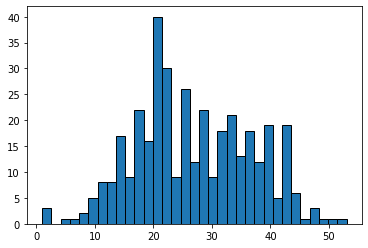

In [17]:
plt.hist(lsoa_cd_df['count'], bins=33, edgecolor='black')

In [18]:
lsoa_cd_df = lsoa_cd_df.sort_values(by='count', ascending=True)

In [19]:
# overlapping lsoa
overlapping_lsoas = lsoa_cd_df['lsoa_cd']
overlapping_lsoas_list = overlapping_lsoas.tolist()
print(type(overlapping_lsoas_list))
print(len(overlapping_lsoas))
print(len(buffer_1000_simple['name']))

<class 'list'>
378
399


In [20]:
merged_df = buffer_1000_simple.merge(lsoa_cd_df, on='name', how='inner')

In [21]:
results = []

# Iterate through each buffer in merged_df
for idx, row in merged_df.iterrows():
    buffer_name = row['name']
    buffer_geom = row['geometry']
    overlapping_lsoas = row['lsoa_cd']
    count = row['count']

    
    # Calculate the total area of the buffer
    total_buffer_area = buffer_geom.area
    
    # Calculate the total area of each LSOA region that overlaps with the buffer
    for lsoa_cd in overlapping_lsoas:
        lsoa_geom = lsoa[lsoa['lsoa_cd'] == lsoa_cd]['geometry'].iloc[0]
        intersection_area = buffer_geom.intersection(lsoa_geom).area
        
        # Calculate the percentage of the LSOA region that overlaps with the buffer
        overlap_percentage = (intersection_area / lsoa_geom.area) * 100
        
        # Append the result to the list
        results.append({'buffer_name': buffer_name, 'lsoa_region': lsoa_cd, 'overlap_percentage': overlap_percentage, 'count':count})

# Create a new DataFrame to store the results
overlap_df = pd.DataFrame(results)

Use remaining lsoas and their % overlap as weight, calculate overall buffer greenery.

In [22]:
lsoa_simple = lsoa.drop(['lsoa_nm', 'lsoa_kmsq', 'canopykmsq', 'la_cd','la_nm', 'geometry'], axis= 1)


In [23]:
calculation = overlap_df.merge(lsoa_simple, left_on='lsoa_region', right_on='lsoa_cd', how='inner')
calculation = calculation.drop(columns='lsoa_region')
calculation = calculation.sort_values(by='buffer_name')

In [24]:
len(calculation)

10155

In [25]:
calculation['weighted_score'] = (calculation['canopy_per'] * (calculation['overlap_percentage'] / 100))
# Group by 'buffer_name' and calculate the final score by summing the weighted scores
canopyscore_1000 = calculation.groupby(['buffer_name','count'])['weighted_score'].sum().reset_index()

In [26]:
canopyscore_1000['weighted_score'] = canopyscore_1000['weighted_score']/canopyscore_1000['count']
canopyscore_1000 = canopyscore_1000.sort_values(by='weighted_score')


(array([ 2.,  6.,  4., 12.,  7., 13., 14., 23., 14., 19., 23., 27., 29.,
        38., 19., 24., 17., 20., 17., 11., 17.,  8.,  5.,  1.,  3.,  0.,
         2.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.62499901,  1.31659942,  2.00819983,  2.69980024,  3.39140065,
         4.08300106,  4.77460147,  5.46620187,  6.15780228,  6.84940269,
         7.5410031 ,  8.23260351,  8.92420392,  9.61580433, 10.30740474,
        10.99900515, 11.69060556, 12.38220597, 13.07380638, 13.76540679,
        14.4570072 , 15.14860761, 15.84020802, 16.53180842, 17.22340883,
        17.91500924, 18.60660965, 19.29821006, 19.98981047, 20.68141088,
        21.37301129, 22.0646117 , 22.75621211, 23.44781252]),
 <BarContainer object of 33 artists>)

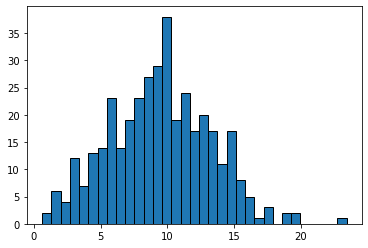

In [27]:
plt.hist(canopyscore_1000['weighted_score'], bins=33, edgecolor='black')

###  Tree canopy in park

In [28]:
green_space_os = gpd.read_file('qgis_data/OSOpenGreenspace_Polygons.shp')
# buffer_1000_simple
# green_space_os_publicpark_garden

In [29]:
park_green_cover = green_space_os.overlay(lsoa, how='intersection')

In [30]:
park_green_cover_list = park_green_cover.groupby('gml_id')['lsoa_cd'].agg(list).reset_index()

park_green_cover_list['count'] = park_green_cover_list['lsoa_cd'].apply(len)

In [31]:
park_green_cover_ready = green_space_os.merge(park_green_cover_list, on='gml_id', how='inner')

In [32]:
# overlapping lsoa
overlapping_lsoas_green = park_green_cover_ready['lsoa_cd']
overlapping_lsoas_green_list = overlapping_lsoas_green.tolist()
print(type(overlapping_lsoas_green_list))

<class 'list'>


In [33]:
results = []

# Iterate through each buffer in merged_df
for idx, row in park_green_cover_ready.iterrows():
    park_id = row['gml_id']
    park_geom = row['geometry']
    overlapping_lsoas = row['lsoa_cd']
    count = row['count']

    
    # Calculate the total area of the buffer
    total_buffer_area = park_geom.area
    
    # Calculate the total area of each LSOA region that overlaps with the buffer
    for lsoa_cd in overlapping_lsoas:
        lsoa_geom = lsoa[lsoa['lsoa_cd'] == lsoa_cd]['geometry'].iloc[0]
        intersection_area = park_geom.intersection(lsoa_geom).area
        
        # Calculate the percentage of the LSOA region that overlaps with the buffer
        overlap_percentage = (intersection_area / lsoa_geom.area) * 100
        
        # Append the result to the list
        results.append({'park_id': park_id, 'lsoa_region': lsoa_cd, 'overlap_percentage': overlap_percentage, 'count':count})

# Create a new DataFrame to store the results
overlap_df = pd.DataFrame(results)

In [34]:
calc_grncover = overlap_df.merge(lsoa_simple, left_on='lsoa_region', right_on='lsoa_cd', how='inner')
calc_grncover = calc_grncover.drop(columns='lsoa_region')
calc_grncover = calc_grncover.sort_values(by='park_id')

In [35]:
calc_grncover['weighted_score'] = (calc_grncover['canopy_per'] * (calculation['overlap_percentage'] / 100))

# Group by 'buffer_name' and calculate the final score by summing the weighted scores
park_canopyscore_1000 = calc_grncover.groupby(['park_id','count'])['weighted_score'].sum().reset_index()

In [36]:
park_canopyscore_1000['weighted_score'] = park_canopyscore_1000['weighted_score']/park_canopyscore_1000['count']
park_canopyscore_1000 = park_canopyscore_1000.sort_values(by='weighted_score')
park_canopyscore_1000

,park_id,count,weighted_score
1904,idF34085A4-5C27-7DA2-E053-AAEFA00AB6EA,1,0.0
1873,idF3408598-61E5-7DA2-E053-AAEFA00AB6EA,2,0.0
7627,idF340861F-39BA-7DA2-E053-AAEFA00AB6EA,2,0.0
7626,idF340861F-398B-7DA2-E053-AAEFA00AB6EA,1,0.0
7625,idF340861F-3904-7DA2-E053-AAEFA00AB6EA,1,0.0
...,...,...,...
6528,idF3408613-FDCE-7DA2-E053-AAEFA00AB6EA,1,64.0
2808,idF34085D4-426D-7DA2-E053-AAEFA00AB6EA,1,70.0
9855,idF340870C-D5E9-7DA2-E053-AAEFA00AB6EA,1,70.0
2794,idF34085D4-3D91-7DA2-E053-AAEFA00AB6EA,1,70.0


### Reachable Green space 1000

#### General Filtering & Cleaning
removed cemetaries, golf course, allotments, tennis courts

In [37]:
print(f"green_space_os ")
print(f" ")
print(f" function column: {green_space_os['function'].unique()} ")
print(f" ===================================================== ")
print(f" ===================================================== ")
print(len(green_space_os))

green_space_os 
 
 function column: ['Public Park Or Garden' 'Play Space' 'Playing Field'
 'Allotments Or Community Growing Spaces' 'Other Sports Facility'
 'Cemetery' 'Bowling Green' 'Religious Grounds' 'Tennis Court'
 'Golf Course'] 
20016


In [38]:
green_space_os_publicpark_garden = green_space_os[green_space_os['function'].isin(['Public Park Or Garden'])]
print(len(green_space_os_publicpark_garden))

green_space_os_publicpark_garden.drop(columns= ['distinct_1', 'distinct_2'], inplace = True)
green_space_os_publicpark_garden["green_area"] = green_space_os_publicpark_garden['geometry'].area

2050


/tmp/ipykernel_40884/1477673575.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_space_os_publicpark_garden.drop(columns= ['distinct_1', 'distinct_2'], inplace = True)
/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [39]:
#Remove parks that are smaller than district size according to GLA

conditions = [
    (green_space_os_publicpark_garden['green_area'] >= 4000000),
    (green_space_os_publicpark_garden['green_area'] >= 600000),
    (green_space_os_publicpark_garden['green_area'] >= 100000)
]

choices = ['regional', 'metropolitan', 'district']

green_space_os_publicpark_garden['region_category'] = np.select(conditions, choices, default='unknown')

green_space_os_publicpark_garden = green_space_os_publicpark_garden[green_space_os_publicpark_garden['green_area'] >= 100000]

print(len(green_space_os_publicpark_garden))

# end up with around 350 parks

350


/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


### Green Space Count & area within buffer & total area of green accessible 1000

In [40]:
lsoa_simple = lsoa.drop(['lsoa_nm', 'lsoa_kmsq', 'canopykmsq', 'la_cd','la_nm', 'geometry'], axis= 1)

In [41]:
#CALCULATE GREEN AREA WITHIN BUFFER AND GREEN AREA ACCESSIBLE
buffer_green_os = buffer_1000_simple.overlay(green_space_os_publicpark_garden, how='intersection')

buffer_green_os["green_area_within_buffer"] = buffer_green_os['geometry'].area
buffer_green_os_total_area = buffer_green_os.groupby('name')['green_area', 'green_area_within_buffer'].sum().reset_index()
buffer_green_os_total_area.rename(columns= {'green_area': 'total_green_area_accessible'}, inplace = True)

/tmp/ipykernel_40884/493143887.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  buffer_green_os_total_area = buffer_green_os.groupby('name')['green_area', 'green_area_within_buffer'].sum().reset_index()


In [42]:
# CALCULATE THE LARGEST ADJACENT GREEN SPACE.
# Step 1: Group by 'name' and find the row with the largest green area in each group
largest_green_areas = buffer_green_os.loc[buffer_green_os.groupby('name')['green_area'].idxmax()]

# Step 2: Create a new column 'largest_adjacent_green' in the original dataframe and initialize it to NaN
buffer_green_os['largest_adjacent_green'] = pd.NA

# Step 3: Assign the largest green areas to the corresponding rows in the new column
for index, row in largest_green_areas.iterrows():
    name = row['name']
    largest_area = row['green_area']
    buffer_green_os.loc[buffer_green_os['name'] == name, 'largest_adjacent_green'] = largest_area

In [43]:
buffer_green_os_list = buffer_green_os.groupby('name')['gml_id'].agg(list).reset_index()
buffer_green_os_list['count'] = buffer_green_os_list['gml_id'].apply(len)

green_space_info= buffer_green_os_total_area.merge(buffer_green_os_list, on = 'name',how='inner')
green_space_info

,name,total_green_area_accessible,green_area_within_buffer,gml_id,count
0,Abbey Road,2.646024e+05,20624.291979,[idF340862D-F679-7DA2-E053-AAEFA00AB6EA],1
1,Acton Town,7.534639e+05,358507.336496,[idF34085F1-96EA-7DA2-E053-AAEFA00AB6EA],1
2,Anerley,5.886649e+05,209875.414576,[idF34085C0-9443-7DA2-E053-AAEFA00AB6EA],1
3,Archway,1.014139e+05,99842.555120,[idF3408609-B4CA-7DA2-E053-AAEFA00AB6EA],1
4,Arnos Grove,3.129418e+05,181499.876868,"[idF34085B0-0DD9-7DA2-E053-AAEFA00AB6EA, idF34...",2
...,...,...,...,...,...
223,Wood Green,6.066061e+05,131566.532803,[idF34085B0-0EE7-7DA2-E053-AAEFA00AB6EA],1
224,Woodford,1.055361e+05,91460.207049,[idF3408616-3B0C-7DA2-E053-AAEFA00AB6EA],1
225,Woodgrange Park,1.636874e+06,271865.376032,[idF340858B-09BE-7DA2-E053-AAEFA00AB6EA],1
226,Woodside Park,1.130522e+05,37650.696211,[idF34085D3-31B7-7DA2-E053-AAEFA00AB6EA],1


In [44]:
print(f" buffer and green spaces overlapped {len(green_space_info)}")
print(f" just green space {len(green_space_os_publicpark_garden)}")
print(f" num buffers {len(buffer_1000_simple)}")

 buffer and green spaces overlapped 228
 just green space 350
 num buffers 399


(array([153.,  57.,  17.,   1.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <BarContainer object of 4 artists>)

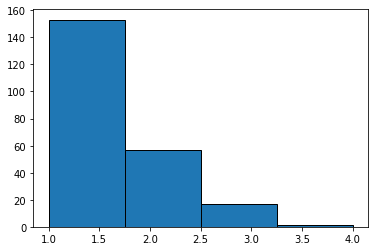

In [45]:
plt.hist(green_space_info['count'], bins=4, edgecolor='black')

### Dist Green
according to distance and size

In [46]:
parkaccess_pt = gpd.read_file('qgis_data/OS Open Greenspace (GML) TQ/data/OSOpenGreenspace_TQ.gml')

In [47]:
buffer_1000_simple['stn_centroid'] = buffer_1000_simple['geometry'].apply(lambda geom: geom.centroid)


In [48]:
buffer_green_os_pt = buffer_green_os.merge(buffer_1000_simple, on='name', how='left')
buffer_green_os_pt.drop([ 'geometry_y'], axis = 1, inplace = True)

In [49]:
buffer_green_os_pt.rename(columns= {'stn_centroid_x': 'stn_centroid','geometry_x': 'geometry' }, inplace = True)

In [50]:
buffer_green_os_pt_accesspt = buffer_green_os_pt.merge(parkaccess_pt, left_on = 'gml_id', right_on = 'refToGreenspaceSite', how = 'left')
# buffer_green_os_pt_accesspt

In [51]:
# Step 1: Convert 'geometry_y' to Point objects for easy distance calculation
buffer_green_os_pt_accesspt['geometry_y'] = buffer_green_os_pt_accesspt['geometry_y'].apply(lambda x: Point(x) if x is not None else None)

# Step 2: Calculate the distance between 'stn_centroid' and each access point of the largest park for each name
def calculate_min_distance(row):
    if row['geometry_y'] is None:
        return None
    largest_green_area = buffer_green_os_pt_accesspt.loc[buffer_green_os_pt_accesspt['name'] == row['name'], 'green_area'].max()
    largest_park_access_points = buffer_green_os_pt_accesspt.loc[(buffer_green_os_pt_accesspt['name'] == row['name']) & (buffer_green_os_pt_accesspt['green_area'] == largest_green_area), 'geometry_y']
    return min(row['stn_centroid'].distance(access_point) for access_point in largest_park_access_points)

buffer_green_os_pt_accesspt['min_entry_dist'] = buffer_green_os_pt_accesspt.apply(calculate_min_distance, axis=1)


In [52]:
buffer_green_os_pt_accesspt.columns

Index(['name', 'gml_id_x', 'function', 'distinctiv', 'green_area',
       'region_category', 'geometry_x', 'green_area_within_buffer',
       'largest_adjacent_green', 'stn_centroid', 'gml_id_y', 'accessType',
       'refToGreenspaceSite', 'geometry_y', 'min_entry_dist'],
      dtype='object')

In [53]:
buffer_green_os_pt_accesspt_cleaned =buffer_green_os_pt_accesspt.drop([ 'gml_id_x', 'function', 'distinctiv', 'green_area',
       'region_category',  'gml_id_y', 'accessType', 'geometry_x',
       'refToGreenspaceSite', 'geometry_y'], axis = 1)

In [54]:
buffer_green_os_pt_accesspt_cleaned = buffer_green_os_pt_accesspt_cleaned.drop_duplicates()
buffer_green_os_pt_accesspt_cleaned

,name,green_area_within_buffer,largest_adjacent_green,stn_centroid,min_entry_dist
0,Acton Town,358507.336496,753463.93545,POINT (519486.465 179592.234),411.751575
12,Gunnersbury,108099.412298,753463.93545,POINT (519830.233 178373.104),768.040118
24,Northfields,2160.691202,753463.93545,POINT (517186.843 179200.439),947.600618
36,South Ealing,166340.293555,753463.93545,POINT (517603.894 179368.688),549.083215
48,South Acton,35989.334668,753463.93545,POINT (520176.093 179266.839),894.204858
...,...,...,...,...,...
7523,Norwood Junction,81400.055581,517698.8018,POINT (534042.901 168216.213),740.307825
7539,Peckham Rye,26423.436441,473562.43635,POINT (534125.981 176263.502),893.107115
7553,Peckham Rye,7556.632333,473562.43635,POINT (534125.981 176263.502),893.107115
7625,Southbury,113788.365834,196328.1082,POINT (534835.456 196224.975),656.138318


### Water in green space?

In [55]:
water = gpd.read_file('qgis_data/greater-london-latest-free.shp/gis_osm_water_a_free_1.shp')
water.drop(['code'], axis = 1, inplace = True)
water = water.to_crs('27700')

In [56]:
# green_space_os_publicpark_garden

In [57]:
water_greenspace = green_space_os_publicpark_garden.overlay(water, how='intersection')

In [58]:
water_greenspace['w_area_within_park'] =water_greenspace['geometry'].area
water_greenspace['percent_water_inpark'] = (water_greenspace['w_area_within_park']/water_greenspace['green_area'])*100
water_greenspace_group= water_greenspace.groupby(['gml_id','distinctiv', 'function', 'region_category'])['w_area_within_park', 'percent_water_inpark'].sum()
water_greenspace_group = water_greenspace_group.sort_values(by='w_area_within_park')
water_greenspace_group

/tmp/ipykernel_40884/3902124368.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  water_greenspace_group= water_greenspace.groupby(['gml_id','distinctiv', 'function', 'region_category'])['w_area_within_park', 'percent_water_inpark'].sum()


,,,,w_area_within_park,percent_water_inpark
gml_id,distinctiv,function,region_category,,
idF3408626-EFEB-7DA2-E053-AAEFA00AB6EA,Cannon Hill Common,Public Park Or Garden,district,0.012726,0.000011
idF340860A-C6D5-7DA2-E053-AAEFA00AB6EA,Green Park,Public Park Or Garden,district,8.414615,0.004440
idF34085CD-2B8A-7DA2-E053-AAEFA00AB6EA,Denham Country Park,Public Park Or Garden,district,16.180735,0.015082
idF340862D-F679-7DA2-E053-AAEFA00AB6EA,West Ham Park,Public Park Or Garden,district,28.451229,0.010752
idF340861E-1C26-7DA2-E053-AAEFA00AB6EA,Barham Park,Public Park Or Garden,district,36.250192,0.035734
...,...,...,...,...,...
idF3408616-3A48-7DA2-E053-AAEFA00AB6EA,Gunpowder Park,Public Park Or Garden,metropolitan,147315.181223,16.800022
idF340862A-BED0-7DA2-E053-AAEFA00AB6EA,Belhus Woods Country Park,Public Park Or Garden,metropolitan,155370.382910,6.712499
idF3408595-0D63-7DA2-E053-AAEFA00AB6EA,Hampstead Heath,Public Park Or Garden,metropolitan,174701.079584,5.523979


In [59]:
#Remove last 3 rows where water was not water
rows_to_remove = water_greenspace.iloc[-3:].index
water_greenspace.drop(rows_to_remove, axis = 0, inplace= True)

### Economic Activities

In [60]:
buffer_1000_simple_geom = buffer_1000_simple.drop(columns=['stn_centroid'])

In [61]:
poi_class_proj_CF = gpd.read_file('qgis_data/poi_class_proj_CF.shp')
poi_class_proj_LT = gpd.read_file('qgis_data/poi_class_proj_LT.shp')
poi_class_proj_ST = gpd.read_file('qgis_data/poi_class_proj_ST.shp')


In [62]:
to_drop = ['pointx_cla', 'feature_ea', 'feature_no', 'pos_accura', 'topo_toid', 'topo_toid_',
       'distance', 'locality', 'admin_boun']

for df in [poi_class_proj_CF, poi_class_proj_LT, poi_class_proj_ST]:
    df.drop(to_drop, axis=1, inplace=True)

In [63]:
combined_poi = pd.concat([poi_class_proj_CF, poi_class_proj_LT, poi_class_proj_ST], ignore_index=True)

In [64]:
poi_buffer = combined_poi.overlay(buffer_1000_simple_geom, how='intersection')
poi_buffer.rename({"name_2": "buffer_name"}, axis = 1, inplace = True)
#From originally 85594 pois, there are now around 2.3x more poi -- assuming bc the same poi falls into multiple buffers

# Count number of each categories there are.
poi_by_buffer = poi_buffer.groupby('buffer_name')['Category'].value_counts().unstack(fill_value=0).reset_index()

In [65]:
poi_by_buffer.describe()

Category,CF,LT,ST
count,377.000000,377.000000,377.000000
mean,5.031830,287.212202,217.960212
std,4.656732,366.909734,257.842183
min,0.000000,2.000000,1.000000
25%,2.000000,86.000000,65.000000
50%,4.000000,170.000000,141.000000
75%,7.000000,310.000000,256.000000
max,22.000000,2334.000000,1964.000000


This is really helpful to determine the ranking and categorisation.

**LT**

Less than 72: dont really know where these places are!

72 - 155:Wapping, West Finchley, Uxbridge, Battersea Park, Belsize Park, Canada Water, Clapton: more residential

155 -300: like smaller neigbourhoods but still got some stuff going on. Bermondy, Balham, Archway, clapham common, Finchley Road, Surrey Quays

300-500: a good number to have for it to be lively. Bethnal Green, White City, Westbourne park. 

From 500 onwards, we are in Baker street territory, warren street, waterloo


**ST**

less than 62: Barkingside, Bromley-by-Bow

62-135: Battersea Park, East Finchley,Forest Gate

135-246: Hampstead Heath, Bruce Grove, Battersea Park, balham

246 - 500: Bethnal green, camden, canary wharf, notthing hill, south ken, victoria

500 + : Covent Garden, shoreditch Embankment, Moorgate, st pauls, algate barbican


## Pulling All Varaibles Together

#### Station canopy total & park area accessible

In [66]:
#Quality of station area: Tree Canopy
# canopyscore_1000
canopyscore_1000.rename(columns={'weighted_score':'stn_a_canopy_score'}, inplace = True)
# canopyscore_1000.drop('count', axis = 1, inplace = True)

In [67]:
canopyscore_1000

,buffer_name,count,stn_a_canopy_score
151,Heathrow Terminals 2 & 3,2,0.624999
150,Heathrow Terminal 5,1,0.975098
14,Bank,18,1.431081
227,North Greenwich,16,1.477128
215,Monument,19,1.668855
...,...,...,...
75,Crouch Hill,36,19.051239
56,Canonbury,39,19.066371
158,Highgate,21,19.376001
25,Belsize Park,35,19.679554


In [68]:
#Quality of Park: Total Area of park accessible
# green_space_info
green_space_info.rename(columns={'name':'buffer_name'}, inplace = True)
green_space_info

,buffer_name,total_green_area_accessible,green_area_within_buffer,gml_id,count
0,Abbey Road,2.646024e+05,20624.291979,[idF340862D-F679-7DA2-E053-AAEFA00AB6EA],1
1,Acton Town,7.534639e+05,358507.336496,[idF34085F1-96EA-7DA2-E053-AAEFA00AB6EA],1
2,Anerley,5.886649e+05,209875.414576,[idF34085C0-9443-7DA2-E053-AAEFA00AB6EA],1
3,Archway,1.014139e+05,99842.555120,[idF3408609-B4CA-7DA2-E053-AAEFA00AB6EA],1
4,Arnos Grove,3.129418e+05,181499.876868,"[idF34085B0-0DD9-7DA2-E053-AAEFA00AB6EA, idF34...",2
...,...,...,...,...,...
223,Wood Green,6.066061e+05,131566.532803,[idF34085B0-0EE7-7DA2-E053-AAEFA00AB6EA],1
224,Woodford,1.055361e+05,91460.207049,[idF3408616-3B0C-7DA2-E053-AAEFA00AB6EA],1
225,Woodgrange Park,1.636874e+06,271865.376032,[idF340858B-09BE-7DA2-E053-AAEFA00AB6EA],1
226,Woodside Park,1.130522e+05,37650.696211,[idF34085D3-31B7-7DA2-E053-AAEFA00AB6EA],1


In [69]:
# merge park canopy and total area of park accessible
# StnCanopy_AreaParkAccessible =green_space_info.merge(canopyscore_1000, on = 'buffer_name', how = 'left')
StnCanopy_AreaParkAccessible =canopyscore_1000.merge(green_space_info, on = 'buffer_name', how = 'left')
# StnCanopy_AreaParkAccessible.fillna(0, inplace=True)

In [70]:
canopyscore_1000

,buffer_name,count,stn_a_canopy_score
151,Heathrow Terminals 2 & 3,2,0.624999
150,Heathrow Terminal 5,1,0.975098
14,Bank,18,1.431081
227,North Greenwich,16,1.477128
215,Monument,19,1.668855
...,...,...,...
75,Crouch Hill,36,19.051239
56,Canonbury,39,19.066371
158,Highgate,21,19.376001
25,Belsize Park,35,19.679554


In [71]:
print(len(StnCanopy_AreaParkAccessible))
StnCanopy_AreaParkAccessible

378


,buffer_name,count_x,stn_a_canopy_score,total_green_area_accessible,green_area_within_buffer,gml_id,count_y
0,Heathrow Terminals 2 & 3,2,0.624999,NaN,NaN,NaN,NaN
1,Heathrow Terminal 5,1,0.975098,NaN,NaN,NaN,NaN
2,Bank,18,1.431081,NaN,NaN,NaN,NaN
3,North Greenwich,16,1.477128,NaN,NaN,NaN,NaN
4,Monument,19,1.668855,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
373,Crouch Hill,36,19.051239,4.776161e+05,114811.915206,[idF34085B0-0F77-7DA2-E053-AAEFA00AB6EA],1.0
374,Canonbury,39,19.066371,NaN,NaN,NaN,NaN
375,Highgate,21,19.376001,1.014139e+05,35973.060657,[idF3408609-B4CA-7DA2-E053-AAEFA00AB6EA],1.0
376,Belsize Park,35,19.679554,3.414868e+06,170032.415546,"[idF3408582-490B-7DA2-E053-AAEFA00AB6EA, idF34...",2.0


#### Distance to Edge

In [72]:
StnCanopy_AreaParkAccessible_DistEdge= StnCanopy_AreaParkAccessible.merge(buffer_green_os_pt_accesspt_cleaned,left_on = 'buffer_name' ,right_on ='name', how = 'left')
StnCanopy_AreaParkAccessible_DistEdge.drop(['name'], axis = 1, inplace = True)
len(StnCanopy_AreaParkAccessible_DistEdge)

468

#### Water in Park & Park Canopy

In [73]:
# Quality of Park: water feature in m2
water_greenspace_filtered= water_greenspace[water_greenspace['w_area_within_park'] > 100]

In [74]:
water_greenspace_grp= water_greenspace.groupby('gml_id')['w_area_within_park'].sum().reset_index()

In [75]:
# Explode the 'gml_id' column to create separate rows for each value in the list
exploded_df = StnCanopy_AreaParkAccessible_DistEdge.explode('gml_id')

# Merge the exploded dataframe with 'park_canopyscore_1000' based on 'gml_id' and 'park_id'
merged_parkcanopy_main = exploded_df.merge(park_canopyscore_1000, left_on='gml_id', right_on='park_id', how='inner')
merged_parkcanopy_main_water =merged_parkcanopy_main.merge(water_greenspace_grp, on = 'gml_id', how = 'left')

# Group by 'buffer_name' and calculate the average of 'weighted_score'
average_weighted_score_by_buffer = merged_parkcanopy_main_water.groupby('buffer_name')['weighted_score', 'w_area_within_park'].mean().reset_index()

average_weighted_score_by_buffer = average_weighted_score_by_buffer[['buffer_name', 'weighted_score', 'w_area_within_park']]


/tmp/ipykernel_40884/2710922019.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_weighted_score_by_buffer = merged_parkcanopy_main_water.groupby('buffer_name')['weighted_score', 'w_area_within_park'].mean().reset_index()


In [76]:
average_weighted_score_by_buffer.rename(columns = {'weighted_score': 'park_canopy_score'}, inplace = True)
#merging park canopy with main
StnCanopy_AreaParkAccessible_DistEdge_ParkCanopyArea_water= StnCanopy_AreaParkAccessible_DistEdge.merge(average_weighted_score_by_buffer, on ='buffer_name', how = 'left' )

In [77]:
print(len(StnCanopy_AreaParkAccessible_DistEdge_ParkCanopyArea_water))
StnCanopy_AreaParkAccessible_DistEdge_ParkCanopyArea_water

468


,buffer_name,count_x,stn_a_canopy_score,total_green_area_accessible,green_area_within_buffer_x,gml_id,count_y,green_area_within_buffer_y,largest_adjacent_green,stn_centroid,min_entry_dist,park_canopy_score,w_area_within_park
0,Heathrow Terminals 2 & 3,2,0.624999,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
1,Heathrow Terminal 5,1,0.975098,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
2,Bank,18,1.431081,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
3,North Greenwich,16,1.477128,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
4,Monument,19,1.668855,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Canonbury,39,19.066371,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
464,Highgate,21,19.376001,1.014139e+05,35973.060657,[idF3408609-B4CA-7DA2-E053-AAEFA00AB6EA],1.0,35973.060657,101413.9375,POINT (528584.652 188160.165),825.013210,49.965618,5295.641733
465,Belsize Park,35,19.679554,3.414868e+06,170032.415546,"[idF3408582-490B-7DA2-E053-AAEFA00AB6EA, idF34...",2.0,729.645135,3162595.10825,POINT (527349.929 185083.427),581.748053,33.485918,174701.079584
466,Belsize Park,35,19.679554,3.414868e+06,170032.415546,"[idF3408582-490B-7DA2-E053-AAEFA00AB6EA, idF34...",2.0,169302.770410,3162595.10825,POINT (527349.929 185083.427),581.748053,33.485918,174701.079584


#### Economic Facilities

In [78]:
variables_main= StnCanopy_AreaParkAccessible_DistEdge_ParkCanopyArea_water.merge(poi_by_buffer, on = 'buffer_name', how = 'left')
variables_main

,buffer_name,count_x,stn_a_canopy_score,total_green_area_accessible,green_area_within_buffer_x,gml_id,count_y,green_area_within_buffer_y,largest_adjacent_green,stn_centroid,min_entry_dist,park_canopy_score,w_area_within_park,CF,LT,ST
0,Heathrow Terminals 2 & 3,2,0.624999,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,0.0,28.0,51.0
1,Heathrow Terminal 5,1,0.975098,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,0.0,23.0,40.0
2,Bank,18,1.431081,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,17.0,1311.0,496.0
3,North Greenwich,16,1.477128,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,1.0,82.0,52.0
4,Monument,19,1.668855,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,15.0,1283.0,478.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Canonbury,39,19.066371,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,7.0,228.0,147.0
464,Highgate,21,19.376001,1.014139e+05,35973.060657,[idF3408609-B4CA-7DA2-E053-AAEFA00AB6EA],1.0,35973.060657,101413.9375,POINT (528584.652 188160.165),825.013210,49.965618,5295.641733,10.0,104.0,65.0
465,Belsize Park,35,19.679554,3.414868e+06,170032.415546,"[idF3408582-490B-7DA2-E053-AAEFA00AB6EA, idF34...",2.0,729.645135,3162595.10825,POINT (527349.929 185083.427),581.748053,33.485918,174701.079584,5.0,154.0,132.0
466,Belsize Park,35,19.679554,3.414868e+06,170032.415546,"[idF3408582-490B-7DA2-E053-AAEFA00AB6EA, idF34...",2.0,169302.770410,3162595.10825,POINT (527349.929 185083.427),581.748053,33.485918,174701.079584,5.0,154.0,132.0


There are only 418 buffers within Greater London.

3 buffers has has no LT or ST facilities

only 224/418 stations had a substantial greenspace within 1000m radius.

and within that 224, only 199 of those stations had access to parks with water in it

## Weighting the scores

In [79]:
variables_main.drop_duplicates(subset = 'buffer_name', inplace = True)

In [80]:
variables_main.drop(['total_green_area_accessible', 'count_x', 'green_area_within_buffer_y', 'green_area_within_buffer_x'], axis = 1, inplace= True)
variables_main.rename(columns = {'count_y': 'park_overlap_count'}, inplace = True)
variables_main.describe()


,stn_a_canopy_score,park_overlap_count,min_entry_dist,park_canopy_score,w_area_within_park,CF,LT,ST
count,378.000000,223.000000,221.000000,223.000000,185.000000,377.000000,377.000000,377.000000
mean,9.461129,1.403587,614.444465,13.126558,39103.349357,5.031830,287.212202,217.960212
std,3.786241,0.635571,305.204232,9.755477,52204.417242,4.656732,366.909734,257.842183
min,0.624999,1.000000,29.915426,0.000000,8.414615,0.000000,2.000000,1.000000
25%,6.843067,1.000000,395.953754,6.895962,3508.058281,2.000000,86.000000,65.000000
50%,9.562196,1.000000,659.737649,11.589153,17677.045257,4.000000,170.000000,141.000000
75%,12.080931,2.000000,864.202139,17.374253,61758.299115,7.000000,310.000000,256.000000
max,23.447813,4.000000,1528.179991,49.965618,324921.412139,22.000000,2334.000000,1964.000000


In [81]:
variables_main.columns

Index(['buffer_name', 'stn_a_canopy_score', 'gml_id', 'park_overlap_count',
       'largest_adjacent_green', 'stn_centroid', 'min_entry_dist',
       'park_canopy_score', 'w_area_within_park', 'CF', 'LT', 'ST'],
      dtype='object')

In [82]:
#REMOVE OUTLIERS
variables_main[variables_main['ST'] == 0]
variables_main = variables_main.loc[variables_main['ST'] >= 0]

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

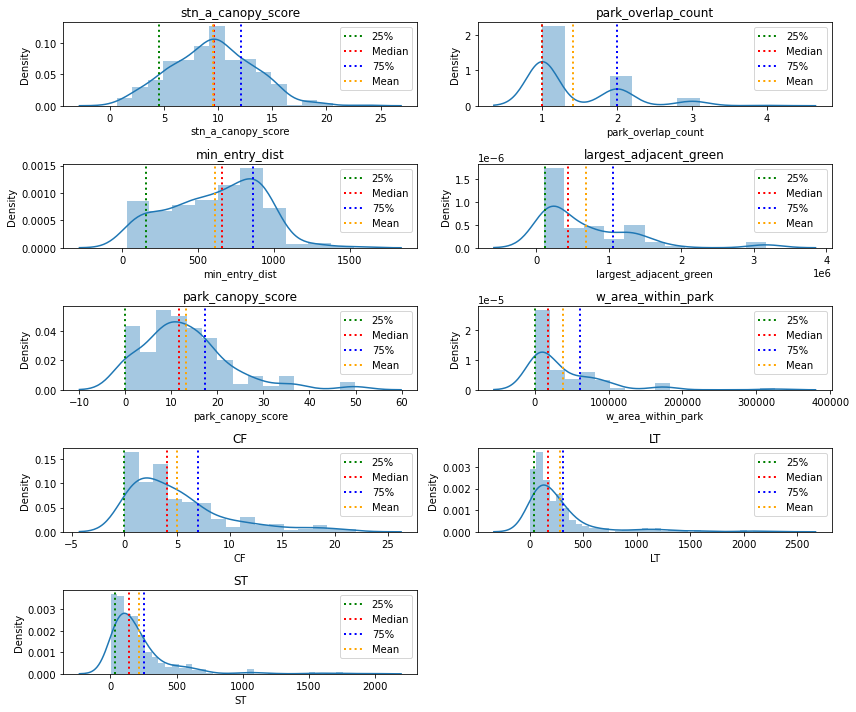

In [83]:
n_rows = 5
n_cols = 2

# Define the list of columns you want to plot
columns_to_plot = ['stn_a_canopy_score', 'park_overlap_count', 'min_entry_dist', 'largest_adjacent_green', 'park_canopy_score', 'w_area_within_park','CF', 'LT', 'ST']

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))

# Flatten the axes array to make it easier to access individual subplots
axes = axes.flatten()

# Iterate through each column and plot the histogram on the corresponding subplot
for i, col in enumerate(columns_to_plot):
    if col in variables_main.columns:
        sns.distplot(variables_main[col], ax=axes[i])
        
        # Calculate and display the 25th, 50th (median), and 75th percentiles
        q25 = variables_main[col].quantile(0.10)
        median = variables_main[col].median()
        q75 = variables_main[col].quantile(0.75)
        mean = variables_main[col].mean()
        
        # Add vertical lines for percentiles and mean
        axes[i].axvline(q25, color='green', linestyle='dotted', linewidth=2, label='25%')
        axes[i].axvline(median, color='red', linestyle='dotted', linewidth=2, label='Median')
        axes[i].axvline(q75, color='blue', linestyle='dotted', linewidth=2, label='75%')
        axes[i].axvline(mean, color='orange', linestyle='dotted', linewidth=2, label='Mean')
        
        axes[i].set_title(col)  # Set the title as the column name
        axes[i].legend()  # Add legend to display percentile and mean lines

# Remove any empty subplots
if len(columns_to_plot) < n_rows * n_cols:
    for i in range(len(columns_to_plot), n_rows * n_cols):
        fig.delaxes(axes[i])

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [84]:
len(variables_main)

377

In [85]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Calculate the 75th percentile for each column (ST, LT, CF)
q75_ST = variables_main['ST'].quantile(0.40)
q75_LT = variables_main['LT'].quantile(0.40)
q75_CF = variables_main['CF'].quantile(0.40)

# Create new columns to indicate whether each entry is above or equal to the 75th percentile
variables_main['Above_Q75_ST'] = (variables_main['ST'] >= q75_ST).astype(int)
variables_main['Above_Q75_LT'] = (variables_main['LT'] >= q75_LT).astype(int)
variables_main['Above_Q75_CF'] = (variables_main['CF'] >= q75_CF).astype(int)

# Create separate DataFrames for entries above and below the 75th percentile
df_above_q75 = variables_main[variables_main[['Above_Q75_ST', 'Above_Q75_LT', 'Above_Q75_CF']].all(axis=1)].copy()

# Invert the condition to include rows not in df_above_q75
df_below_q75 = variables_main[~variables_main[['Above_Q75_ST', 'Above_Q75_LT', 'Above_Q75_CF']].all(axis=1)].copy()

# Apply MinMaxScaler to standardize the entries below the 75th percentile
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_below_q75[['ST', 'LT', 'CF']])
scaled_columns = ['ST_scaled', 'LT_scaled', 'CF_scaled']
df_below_q75[scaled_columns] = scaled_values

# Fill NaN values with 1 in the above percentile DataFrame
df_above_q75[scaled_columns] = 1

# Concatenate the DataFrames back together
variables_main = pd.concat([df_above_q75, df_below_q75])

# Drop the temporary 'Above' columns
variables_main.drop(columns=['Above_Q75_ST', 'Above_Q75_LT', 'Above_Q75_CF'], inplace=True)


/tmp/ipykernel_40884/3016240230.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables_main['Above_Q75_ST'] = (variables_main['ST'] >= q75_ST).astype(int)
/tmp/ipykernel_40884/3016240230.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables_main['Above_Q75_LT'] = (variables_main['LT'] >= q75_LT).astype(int)
/tmp/ipykernel_40884/3016240230.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [86]:
# Assuming 'object_column' is the name of the object column you want to convert
variables_main['largest_adjacent_green'] = pd.to_numeric(variables_main['largest_adjacent_green'], errors='coerce')

In [87]:
variables_main.columns

Index(['buffer_name', 'stn_a_canopy_score', 'gml_id', 'park_overlap_count',
       'largest_adjacent_green', 'stn_centroid', 'min_entry_dist',
       'park_canopy_score', 'w_area_within_park', 'CF', 'LT', 'ST',
       'ST_scaled', 'LT_scaled', 'CF_scaled'],
      dtype='object')

In [88]:
#TRANSFORM DATA WITH MINMAX TRANSFORMER

columns_to_scale = ['stn_a_canopy_score', 'largest_adjacent_green', 'min_entry_dist', 'park_canopy_score', 'w_area_within_park', 'ST_scaled', 'LT_scaled', 'CF_scaled']

# Extract the numerical columns for transformation (excluding 'buffer_name')
numerical_cols = variables_main.drop(columns=['buffer_name', 'gml_id', 'stn_centroid'])

# Create a copy of the numerical columns to apply RobustScaler
numerical_cols_scaled = numerical_cols.copy()

# Create the QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
scaler = MinMaxScaler()
rs = RobustScaler(quantile_range=(10.0, 90.0)) # makes the index value shopping a lot more
sc_X = StandardScaler()  # makes the index value shopping a lot more


# Fit and transform only the selected columns using the RobustScaler
numerical_cols_scaled[columns_to_scale] = scaler.fit_transform(numerical_cols[columns_to_scale])

# Create a new DataFrame with the transformed data
transformed_df = pd.DataFrame(numerical_cols_scaled, columns=numerical_cols.columns)

# Add the 'buffer_name' column to the new DataFrame
transformed_df['buffer_name'] = variables_main['buffer_name']


In [89]:
transformed_df.columns

Index(['stn_a_canopy_score', 'park_overlap_count', 'largest_adjacent_green',
       'min_entry_dist', 'park_canopy_score', 'w_area_within_park', 'CF', 'LT',
       'ST', 'ST_scaled', 'LT_scaled', 'CF_scaled', 'buffer_name'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

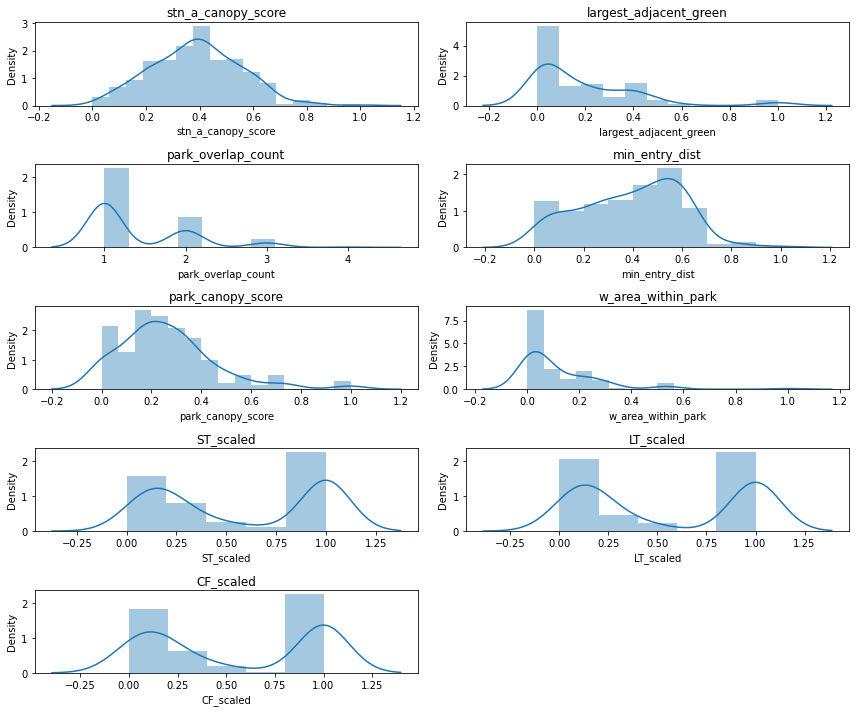

In [90]:
n_rows = 5
n_cols = 2

columns_to_plot = ['stn_a_canopy_score', 'largest_adjacent_green', 'park_overlap_count',
                   'min_entry_dist', 'park_canopy_score', 'w_area_within_park', 'ST_scaled',
                   'LT_scaled', 'CF_scaled']

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))

# Flatten the axes array to make it easier to access individual subplots
axes = axes.flatten()

# Iterate through each column and plot the histogram on the corresponding subplot
for i, col in enumerate(columns_to_plot):
    if col in transformed_df.columns:
        sns.distplot(transformed_df[col], ax=axes[i])
        axes[i].set_title(col)  # Set the title as the column name

# Remove any empty subplots
if len(columns_to_plot) < n_rows * n_cols:
    for i in range(len(columns_to_plot), n_rows * n_cols):
        fig.delaxes(axes[i])

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [91]:
# WEGHTING, MINMAXSCALER, WEIGHTING AGAIN.
# transformed_df.fillna(0, inplace=True)

#Green score
transformed_df['green_score'] = transformed_df['park_canopy_score']*0.3 + transformed_df['w_area_within_park']*0.2
+ transformed_df['largest_adjacent_green']*0.4 +transformed_df['park_overlap_count']*0.1

#Activity Score
transformed_df['activity_score'] = transformed_df['LT_scaled']*0.4 + transformed_df['ST_scaled']*0.4 + transformed_df['CF_scaled']*0.2

#Area Score
transformed_df['stn_area'] = transformed_df['stn_a_canopy_score']*0.5 +(1- transformed_df['min_entry_dist'])*0.5

transformed_df['green_score'] = transformed_df['green_score'].fillna(0)
transformed_df['stn_area'] = transformed_df['stn_area'].fillna(0)

# =====================================================================================
columns_to_transform = {
    'green_score': 'green_score_transformed',
    'activity_score': 'activity_score_transformed'}

# Create the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to selected columns and store them back with new names in the original DataFrame
for orig_col, new_col in columns_to_transform.items():
    transformed_df[new_col] = scaler.fit_transform(transformed_df[[orig_col]])
# =====================================================================================

#Final Score
transformed_df['final_score'] = (transformed_df['green_score_transformed']*0.6 + transformed_df['activity_score_transformed']*0.3 + transformed_df['stn_area']*0.1)
# =====================================================================================
columns_to_transform = {
    'final_score': 'final_score_transformed'}

# Create the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to selected columns and store them back with new names in the original DataFrame
for orig_col, new_col in columns_to_transform.items():
    transformed_df[new_col] = scaler.fit_transform(transformed_df[[orig_col]])
# # # =====================================================================================

transformed_df = transformed_df.sort_values(by='final_score_transformed')


In [92]:
transformed_df[transformed_df['buffer_name'] == 'Uxbridge']

,stn_a_canopy_score,park_overlap_count,largest_adjacent_green,min_entry_dist,park_canopy_score,w_area_within_park,CF,LT,ST,ST_scaled,LT_scaled,CF_scaled,buffer_name,green_score,activity_score,stn_area,green_score_transformed,activity_score_transformed,final_score,final_score_transformed
217,0.385788,1.0,0.009917,0.433562,0.136414,0.008162,8.0,116.0,135.0,0.319809,0.177847,0.571429,Uxbridge,0.042556,0.313348,0.476113,0.122594,0.311199,0.214527,0.225205


In [93]:
transformed_df.describe()

,stn_a_canopy_score,park_overlap_count,largest_adjacent_green,min_entry_dist,park_canopy_score,w_area_within_park,CF,LT,ST,ST_scaled,LT_scaled,CF_scaled,green_score,activity_score,stn_area,green_score_transformed,activity_score_transformed,final_score,final_score_transformed
count,377.000000,223.000000,223.000000,221.000000,223.000000,185.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,0.388051,1.403587,0.188918,0.390137,0.262712,0.120324,5.031830,287.212202,217.960212,0.571564,0.545331,0.543956,0.052181,0.555549,0.299221,0.150320,0.554158,0.286362,0.300791
std,0.165214,0.635571,0.220622,0.203705,0.195244,0.160672,4.656732,366.909734,257.842183,0.408669,0.424335,0.432059,0.074963,0.413159,0.270263,0.215949,0.414452,0.199300,0.209707
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.003120,0.000000,0.000000,0.000000,0.000497,0.000000
25%,0.272898,1.000000,0.026720,0.244308,0.138014,0.010771,2.000000,86.000000,65.000000,0.152745,0.131045,0.142857,0.000000,0.152272,0.000000,0.000000,0.149619,0.108390,0.113526
50%,0.391806,1.000000,0.107460,0.420368,0.231943,0.054380,4.000000,170.000000,141.000000,0.501193,0.396256,0.428571,0.000000,0.372781,0.364039,0.000000,0.370818,0.300000,0.315141
75%,0.502002,2.000000,0.312640,0.556835,0.347724,0.190051,7.000000,310.000000,256.000000,1.000000,1.000000,1.000000,0.089043,1.000000,0.539425,0.256510,1.000000,0.397020,0.417227
max,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,22.000000,2334.000000,1964.000000,1.000000,1.000000,1.000000,0.347134,1.000000,0.865144,1.000000,1.000000,0.950873,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='final_score_transformed', ylabel='Density'>

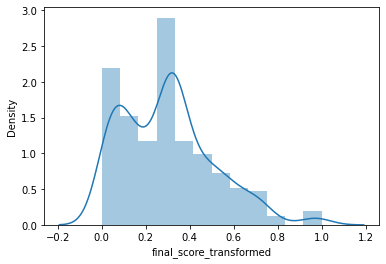

In [94]:
# sns.distplot(transformed_df['green_score_transformed'])
sns.distplot(transformed_df['final_score_transformed'])

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


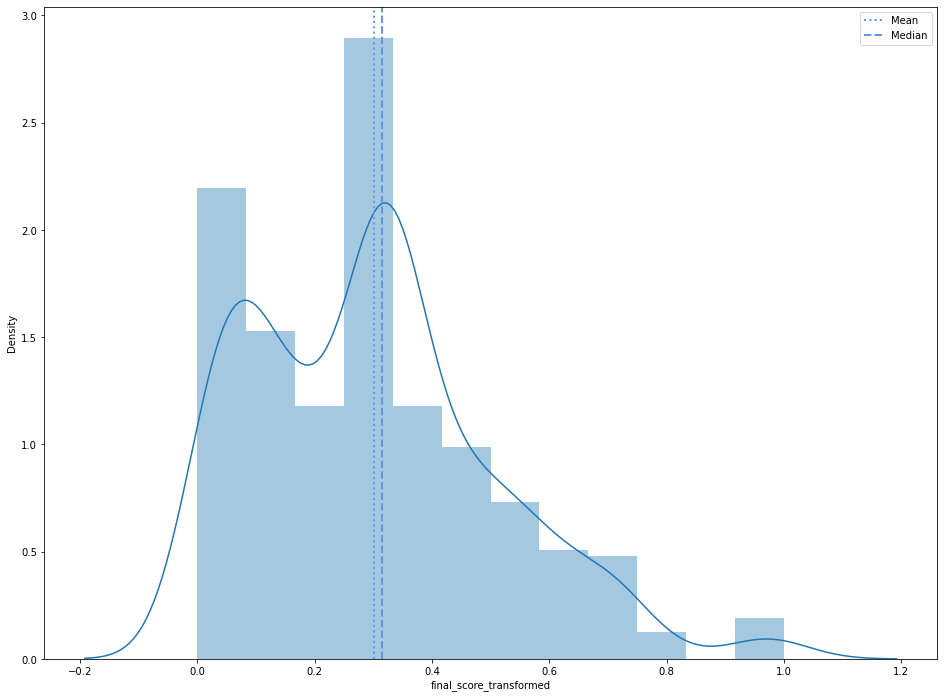

In [95]:
# Set the figure size
plt.figure(figsize=(16, 12))

# Plot the histogram
sns.distplot(transformed_df['final_score_transformed'])

# Calculate the mean and median
mean_value = transformed_df['final_score_transformed'].mean()
median_value = transformed_df['final_score_transformed'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='cornflowerblue', linestyle='dotted', linewidth=2, label='Mean')
plt.axvline(median_value, color='cornflowerblue', linestyle='--', linewidth=2, label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [96]:
transformed_df =transformed_df.drop_duplicates()

In [97]:
transformed_df[transformed_df['activity_score_transformed'] == 1]

,stn_a_canopy_score,park_overlap_count,largest_adjacent_green,min_entry_dist,park_canopy_score,w_area_within_park,CF,LT,ST,ST_scaled,LT_scaled,CF_scaled,buffer_name,green_score,activity_score,stn_area,green_score_transformed,activity_score_transformed,final_score,final_score_transformed
2,0.035319,NaN,NaN,NaN,NaN,NaN,17.0,1311.0,496.0,1.0,1.0,1.0,Bank,0.000000,1.0,0.000000,0.000000,1.0,0.300000,0.315141
155,0.322462,NaN,NaN,NaN,NaN,NaN,12.0,1095.0,590.0,1.0,1.0,1.0,Russell Square,0.000000,1.0,0.000000,0.000000,1.0,0.300000,0.315141
94,0.245932,NaN,NaN,NaN,NaN,NaN,4.0,148.0,124.0,1.0,1.0,1.0,Langdon Park,0.000000,1.0,0.000000,0.000000,1.0,0.300000,0.315141
107,0.270510,NaN,NaN,NaN,NaN,NaN,6.0,275.0,181.0,1.0,1.0,1.0,Deptford Bridge,0.000000,1.0,0.000000,0.000000,1.0,0.300000,0.315141
110,0.272300,NaN,NaN,NaN,NaN,NaN,13.0,420.0,710.0,1.0,1.0,1.0,Sloane Square,0.000000,1.0,0.000000,0.000000,1.0,0.300000,0.315141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,0.834891,2.0,1.0,0.368315,0.670179,0.53766,5.0,154.0,132.0,1.0,1.0,1.0,Belsize Park,0.308586,1.0,0.733288,0.888953,1.0,0.906701,0.953521
342,0.495445,1.0,1.0,0.620673,0.729939,0.53766,3.0,381.0,344.0,1.0,1.0,1.0,Kentish Town West,0.326514,1.0,0.437386,0.940598,1.0,0.908098,0.954991
400,0.562083,1.0,1.0,0.093127,0.729939,0.53766,4.0,176.0,135.0,1.0,1.0,1.0,Gospel Oak,0.326514,1.0,0.734478,0.940598,1.0,0.937807,0.986251
459,0.750901,1.0,1.0,0.026129,0.729939,0.53766,6.0,155.0,165.0,1.0,1.0,1.0,Hampstead Heath,0.326514,1.0,0.862386,0.940598,1.0,0.950598,0.999710


In [98]:
top20green=transformed_df.nlargest(20, 'green_score_transformed')
top20qual=transformed_df.nlargest(20, 'stn_area')
top20hri=transformed_df.nlargest(20, 'final_score_transformed')

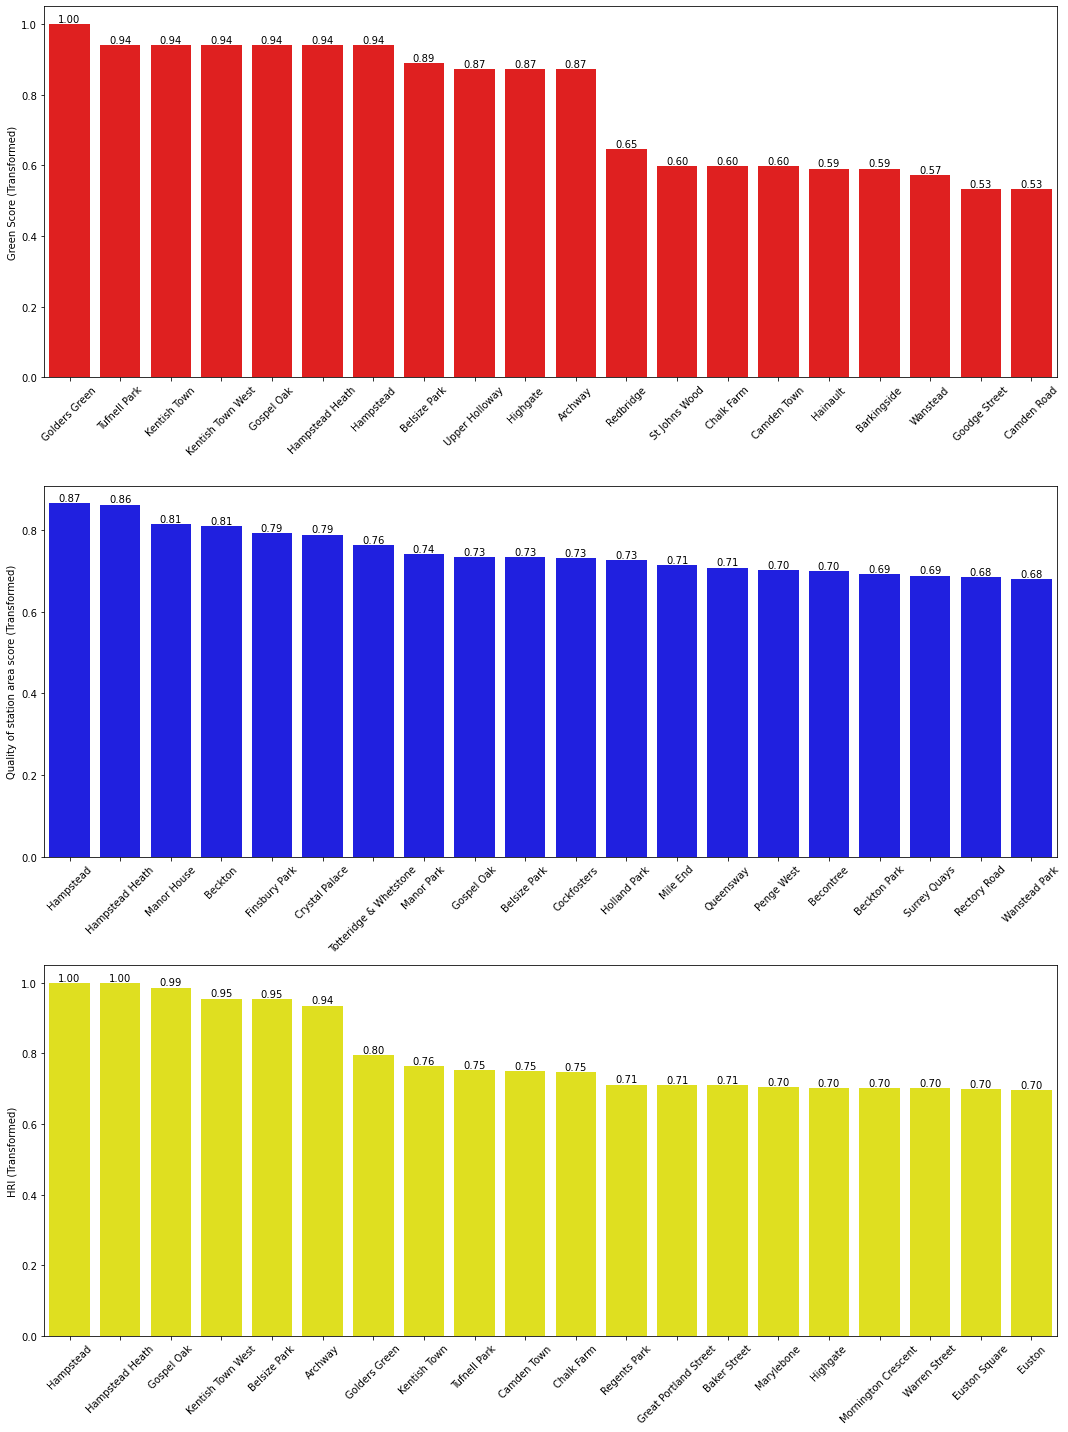

In [99]:
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

ax1 = sns.barplot(data=top20green, x="buffer_name", y="green_score_transformed", ax=axes[0], color='red')
ax1.set_xlabel("")
ax1.set_ylabel("Green Score (Transformed)")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
for i in ax1.containers:
    ax1.bar_label(i, fmt='%.2f', color='black')  # Add labels with 2 decimal places

# Second Subplot
ax2 = sns.barplot(data=top20qual, x="buffer_name", y="stn_area", ax=axes[1], color='blue')
ax2.set_xlabel("")
ax2.set_ylabel("Quality of station area score (Transformed)")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
for i in ax2.containers:
    ax2.bar_label(i, fmt='%.2f', color='black')  # Add labels with 2 decimal places

# Third Subplot
ax3 = sns.barplot(data=top20hri, x="buffer_name", y="final_score_transformed", ax=axes[2], color='yellow')
ax3.set_xlabel("")
ax3.set_ylabel("HRI (Transformed)")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
for i in ax3.containers:
    ax3.bar_label(i, fmt='%.2f', color='black')  # Add labels with 2 decimal places

plt.savefig("output/top20_3index.png")

plt.tight_layout()
plt.show()


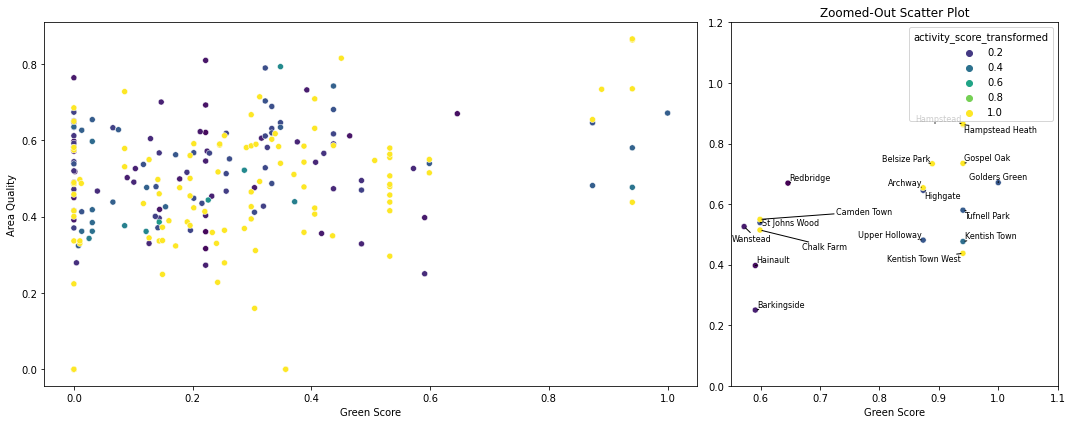

In [139]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 1]})

# Plot the original scatter plot on the left subplot without point labels
sns.scatterplot(data=transformed_df, x="green_score_transformed", y="stn_area", hue="activity_score_transformed", sizes=(20, 200), ax=axes[0], palette="viridis",legend = False)
# axes[0].set_title("Scatter Plot of Green Score,  Activity Score and Quality Score")
axes[0].set_xlabel("Green Score")
axes[0].set_ylabel("Area Quality")

# Plot the zoomed-out scatter plot on the right subplot
zoomed_out_df = transformed_df[(transformed_df['green_score_transformed'] >= 0.55) & (transformed_df['stn_area'] >= 0.2)]
scatter_plot = sns.scatterplot(data=zoomed_out_df, x="green_score_transformed", y="stn_area", hue="activity_score_transformed", sizes=(10, 100), ax=axes[1], palette="viridis")
scatter_plot.set_title("Zoomed-Out Scatter Plot")
scatter_plot.set_xlabel("Green Score")
scatter_plot.set_ylabel("")
scatter_plot.set_xlim(0.55, 1.1)
scatter_plot.set_ylim(0, 1.2)

# Add overlapping labels to the zoom-out plot
texts = []
for index, row in zoomed_out_df.iterrows():
    texts.append(plt.text(row['green_score_transformed'], row['stn_area'], row['buffer_name'], fontsize=8))

adjust_text(texts, ax=scatter_plot, arrowprops=dict(arrowstyle='-', color='black'))

plt.savefig("output/Index_scatter.png")

# Show the plots side by side
plt.tight_layout()
plt.show()

In [101]:
hlight = ['Hampstead', 'Hampstead Heath', 'Gospel Oak', 'Golders Green', 'Belsize Park',
          'Tufnell Park', 'Kentish Town','Kentish Town West', 'Redbridge',
          'Archway', 'Highgate', 'Upper Holloway']

potential_df = transformed_df[transformed_df['buffer_name'].isin(hlight)].copy()  # Create a copy
potential_df.drop(['stn_a_canopy_score', 'park_overlap_count', 'largest_adjacent_green',
       'min_entry_dist', 'park_canopy_score', 'w_area_within_park', 'CF', 'LT',
       'ST', 'ST_scaled', 'LT_scaled', 'CF_scaled',
       'green_score', 'activity_score', 'final_score', 'final_score_transformed'], axis=1, inplace=True)
potential_df.set_index('buffer_name', inplace=True)


In [102]:
potential_df = potential_df[['activity_score_transformed', 'green_score_transformed', 'stn_area']]

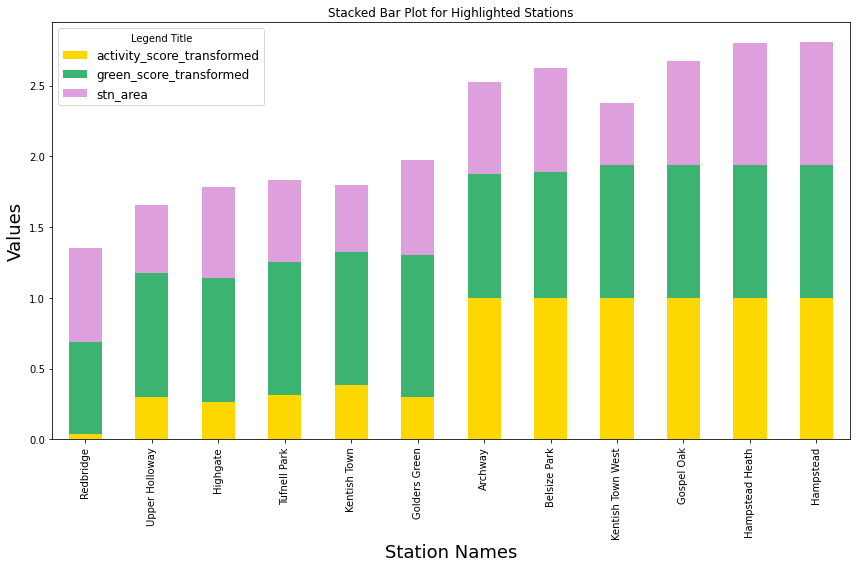

In [103]:

fig, ax = plt.subplots(figsize=(12, 8))

potential_df.plot(kind='bar', stacked=True, color=['gold', 'mediumseagreen', 'plum'], ax=ax)

ax.set_title("Stacked Bar Plot for Highlighted Stations", fontsize=12)
ax.set_xlabel("Station Names", fontsize=18)
ax.set_ylabel("Values", fontsize=18)

ax.legend(title="Legend Title", fontsize=12)

plt.savefig("output/top_12_potential.png")


plt.tight_layout()
plt.show()


In [104]:
lines = gpd.read_file('data/tfl_line_CLEANED.json')
lines = lines.to_crs('epsg:27700')

In [105]:
centroid = buffer_1000_simple.drop('geometry', axis= 1)
centroid.rename(columns = {'stn_centroid': 'geometry'}, inplace = True)

In [106]:
transformed_df_geo =  centroid.merge(transformed_df, right_on= 'buffer_name', left_on= 'name', how = 'right')
# transformed_df_geo= transformed_df_geo.to_crs('epsg:27700')

In [107]:
condition1 = (transformed_df_geo['name'] == 'Cambridge Heath') & (transformed_df_geo['stn_area'] == 0)
condition2 = (transformed_df_geo['name'] == 'London Fields') & (transformed_df_geo['stn_area'] == 0)
transformed_df_geo = transformed_df_geo[~condition1]
transformed_df_geo = transformed_df_geo[~condition2]
transformed_df_geo[transformed_df_geo['name'].duplicated(keep=False)]

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1428: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


,name,geometry,stn_a_canopy_score,park_overlap_count,largest_adjacent_green,min_entry_dist,park_canopy_score,w_area_within_park,CF,LT,...,LT_scaled,CF_scaled,buffer_name,green_score,activity_score,stn_area,green_score_transformed,activity_score_transformed,final_score,final_score_transformed


In [108]:
# Sort the DataFrame based on each column and get the top 30 rows
top_50_green_score = transformed_df.sort_values(by="green_score_transformed", ascending=False).head(50)
top_50_activity_score = transformed_df.sort_values(by="activity_score_transformed", ascending=False).head(50)
top_50_stn_area = transformed_df.sort_values(by="stn_area", ascending=False).head(50)

top_100_final_score = transformed_df_geo.sort_values(by="final_score_transformed", ascending=False).head(100)
top_50_final_score = transformed_df_geo.sort_values(by="final_score_transformed", ascending=False).head(50)


top_100_final_score[['buffer_name','final_score_transformed']].to_csv('data/top_100_final_score.csv')
top_50_final_score[['buffer_name','final_score_transformed']].to_csv('data/top_50_final_score.csv')


## Visualising data

/tmp/ipykernel_40884/3253906805.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


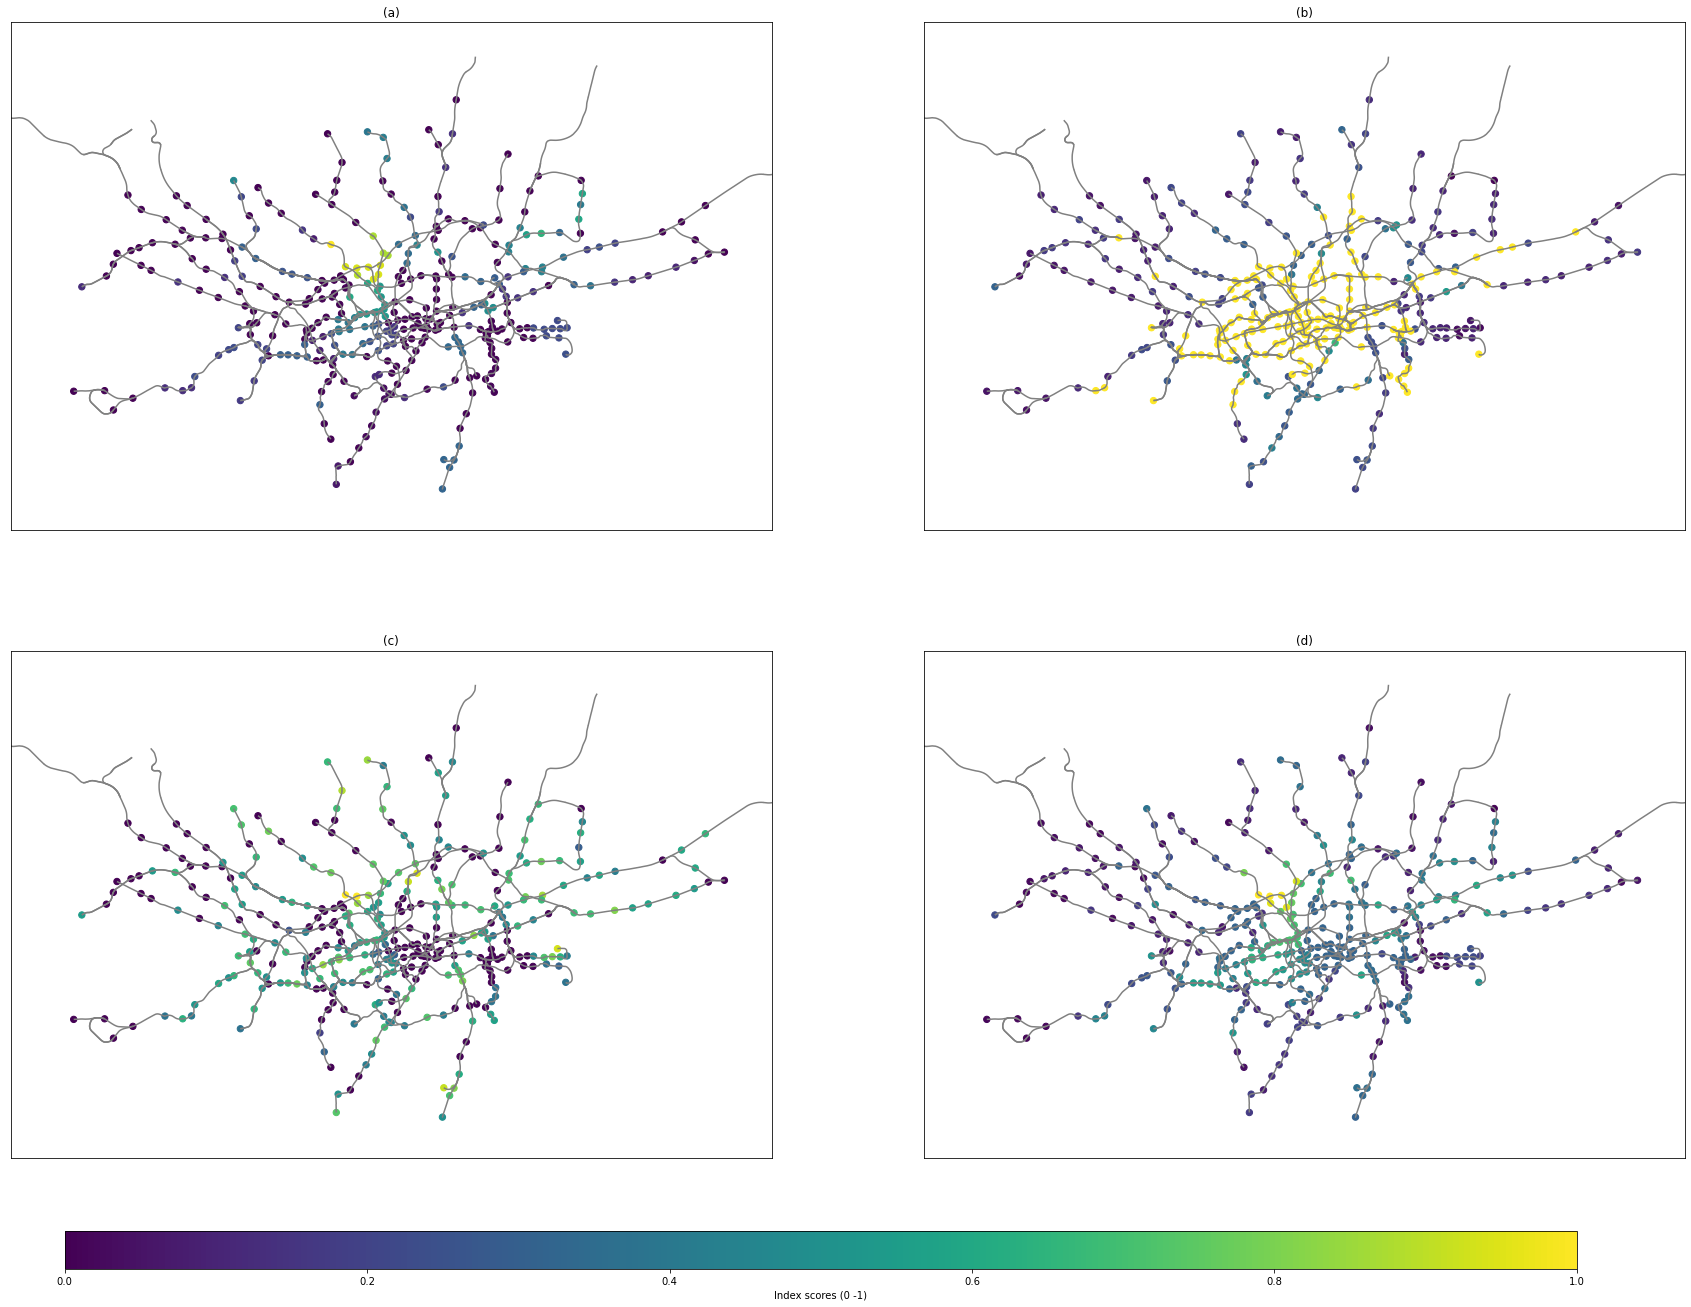

In [109]:
# Create a larger figure and set the figure size
fig, axes = plt.subplots(2, 2, figsize=(30, 26), gridspec_kw={'wspace':0.2, 'hspace':-0.2}) 

# Green Infrastructure Plot
lines.plot(ax=axes[0, 0], color='grey', edgecolor='white')
green_infra_plot = transformed_df_geo.plot(column="green_score_transformed", ax=axes[0,0], marker='o', cmap='viridis', markersize=40,
                                           legend=False)
axes[0,0].set_title("(a)")
axes[0,0].set_xlim([500000, 560000])
axes[0,0].set_ylim([165000, 205000])
axes[0,0].set_xticks([])
axes[0,0].set_yticks([])


# Activity Infrastructure Plot
lines.plot(ax=axes[0,1], color='grey', edgecolor='white')
activity_infra_plot = transformed_df_geo.plot(column="activity_score_transformed", ax=axes[0,1], marker='o', cmap='viridis', markersize=40,
                                           legend=False)
axes[0,1].set_title("(b)")
axes[0,1].set_xlim([500000, 560000])
axes[0,1].set_ylim([165000, 205000])
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])


# Quality of Station Area Plot
lines.plot(ax=axes[1,0], color='grey', edgecolor='white')
station_area_plot = transformed_df_geo.plot(column="stn_area", ax=axes[1,0], marker='o', cmap='viridis', markersize=40,
                                           legend=False)
axes[1,0].set_title("(c)")
axes[1,0].set_xlim([500000, 560000])
axes[1,0].set_ylim([165000, 205000])
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])
# Add the fourth subplot (assuming it's named "Fourth Plot")
lines.plot(ax=axes[1,1], color='grey', edgecolor='white')
heat_resilience_plot = transformed_df_geo.plot(column="final_score_transformed", ax=axes[1,1], marker='o', cmap='viridis', markersize=40,
                                           legend=False)
axes[1,1].set_title("(d)")
axes[1,1].set_xlim([500000, 560000])
axes[1,1].set_ylim([165000, 205000])
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])

# Adjust plot layout to prevent overlapping labels
plt.tight_layout()

# Add a shared colorbar
cbar_ax = fig.add_axes([0.15, 0.14, 0.7, .02])  # Adjust the position and size of the colorbar
cbar = fig.colorbar(green_infra_plot.collections[0], cax=cbar_ax, orientation='horizontal')
cbar.set_label('Index scores (0 -1)')

plt.savefig("output/Indexes_map.png")

# Show the plots side by side
plt.show()


(165000.0, 205000.0)

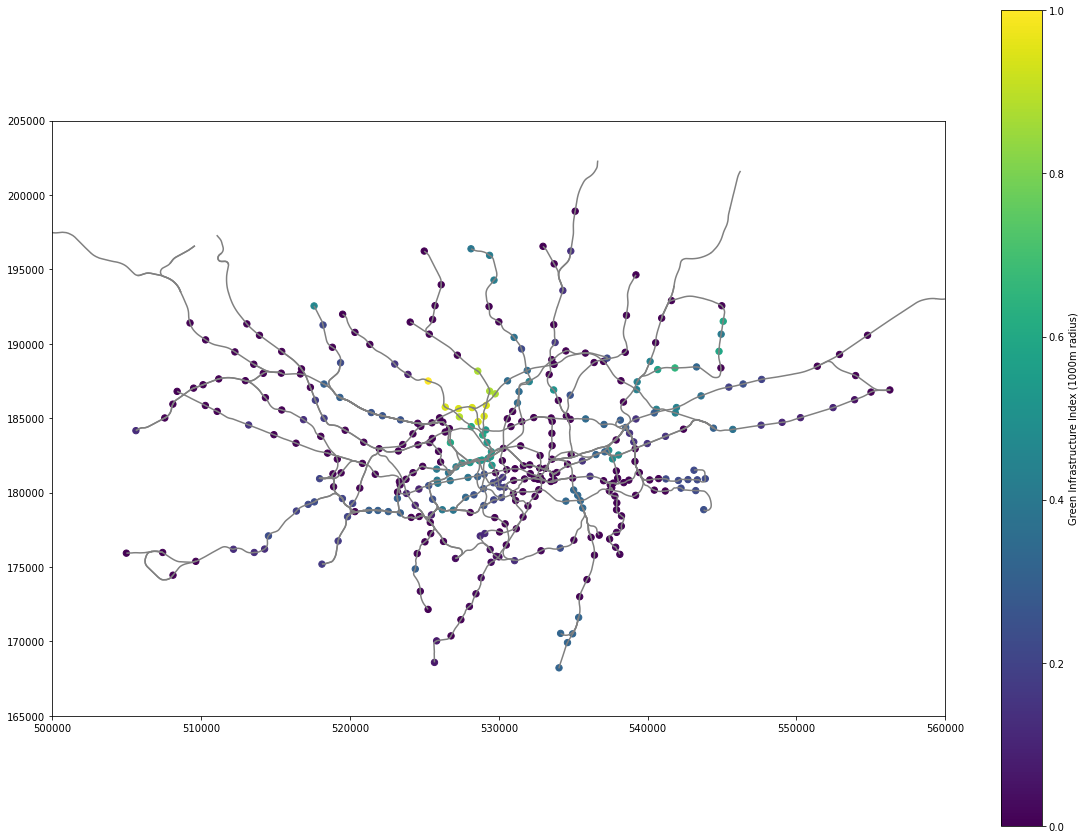

In [110]:
#GREEN INFRASTRUCTURE

fig, ax = plt.subplots(figsize=(20,15))

lines.plot(ax=ax, color='grey', edgecolor='white')
transformed_df_geo.plot(column = "green_score_transformed", ax=ax, marker='o', cmap='viridis', markersize= 40,
                       legend=True, legend_kwds={'label':'Green Infrastructure Index (1000m radius)'})
# ax.set_title("Plot of Green Infrastructure for London Underground Station areas");

# Set the x and y limits
ax.set_xlim([500000, 560000])
ax.set_ylim([165000, 205000])

(165000.0, 205000.0)

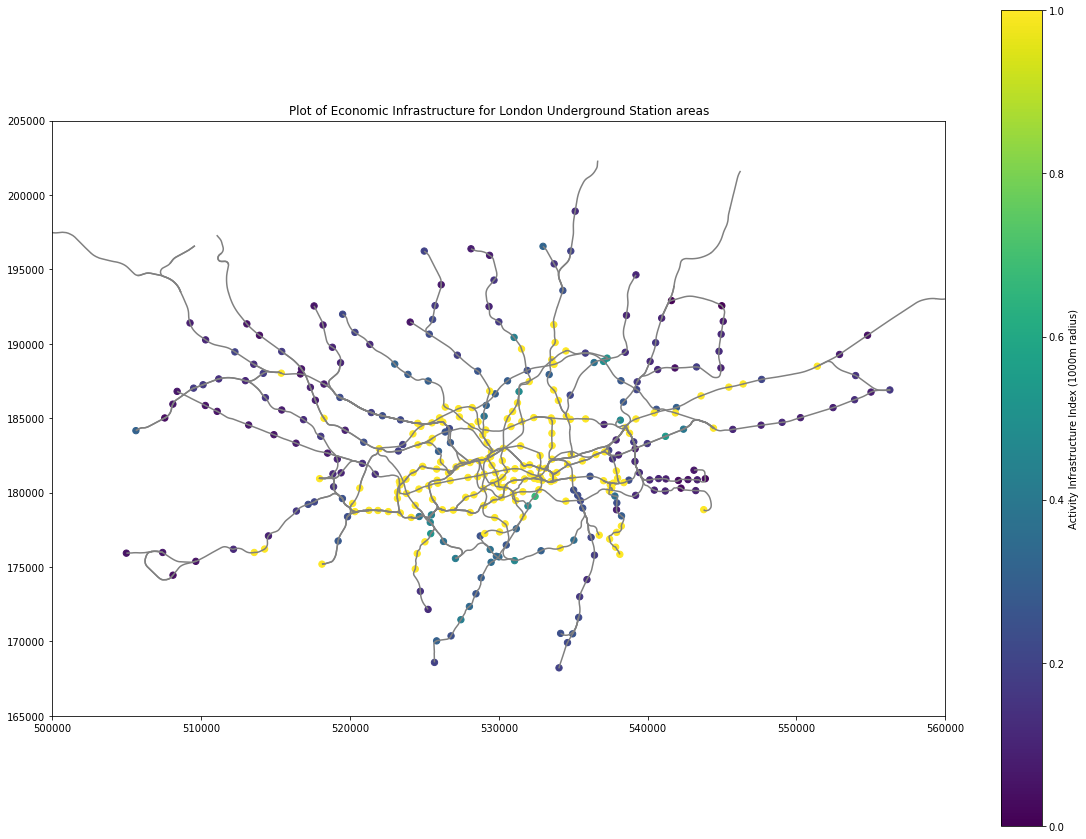

In [111]:
#ECONOMIC INFRASTRUCTURE

fig, ax = plt.subplots(figsize=(20,15))

lines.plot(ax=ax, color='grey', edgecolor='white')
transformed_df_geo.plot(column = "activity_score_transformed", ax=ax, marker='o', cmap='viridis', markersize= 40,
                       legend=True, legend_kwds={'label':'Activity Infrastructure Index (1000m radius)'})
ax.set_title("Plot of Economic Infrastructure for London Underground Station areas");

# Set the x and y limits
ax.set_xlim([500000, 560000])
ax.set_ylim([165000, 205000])

(165000.0, 205000.0)

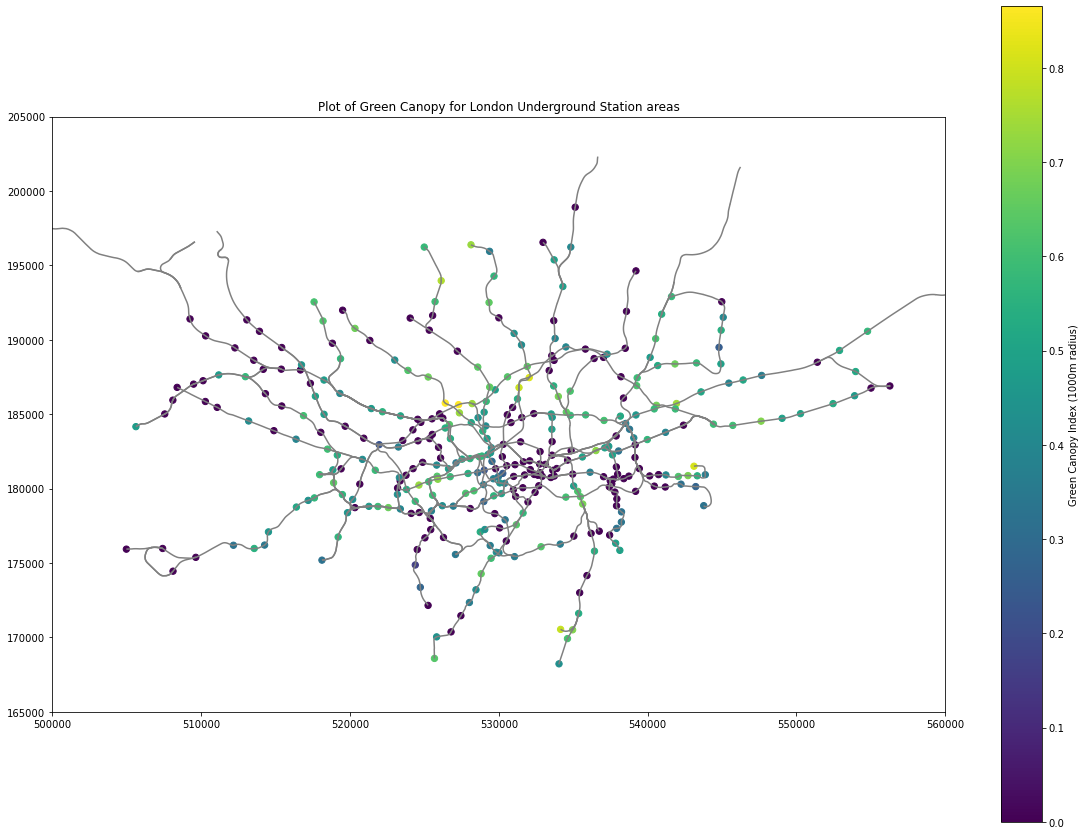

In [112]:
#Green canopy INFRASTRUCTURE

fig, ax = plt.subplots(figsize=(20,15))

lines.plot(ax=ax, color='grey', edgecolor='white')
transformed_df_geo.plot(column = "stn_area", ax=ax, marker='o', cmap='viridis', markersize= 40,
                       legend=True, legend_kwds={'label':'Green Canopy Index (1000m radius)'})
ax.set_title("Plot of Green Canopy for London Underground Station areas");

# Set the x and y limits
ax.set_xlim([500000, 560000])
ax.set_ylim([165000, 205000])

(165000.0, 205000.0)

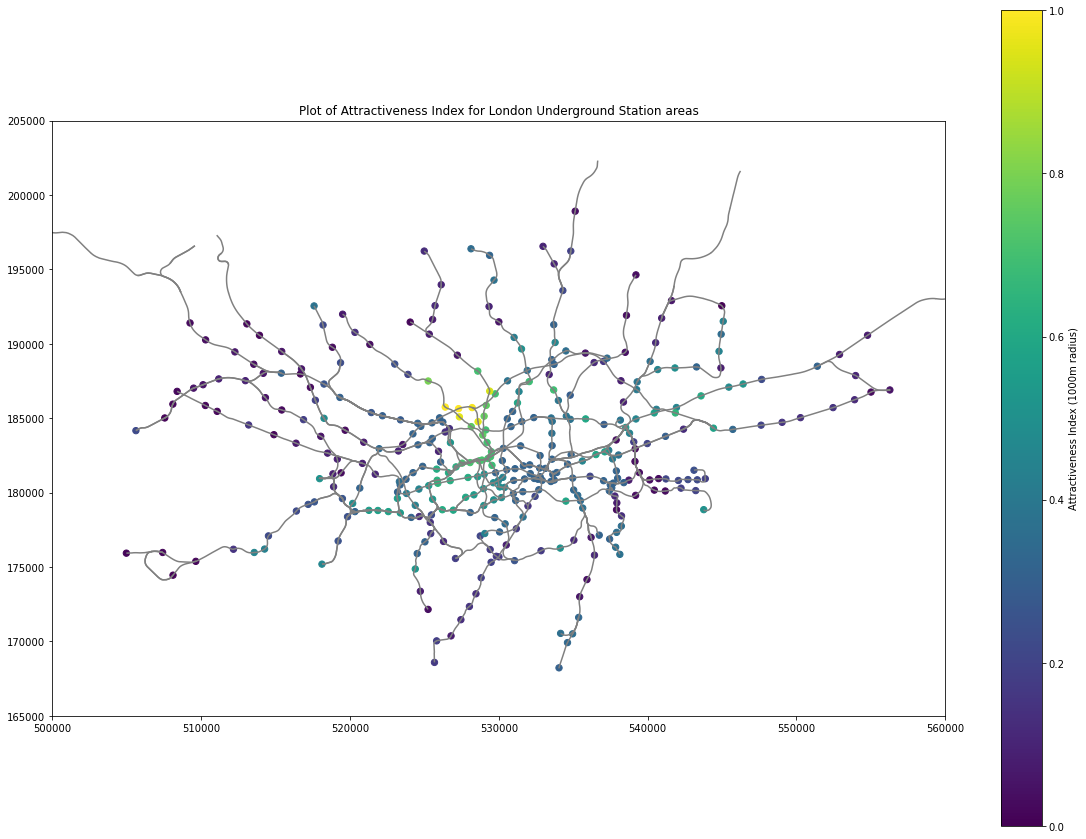

In [113]:
# FINAL SCORE

fig, ax = plt.subplots(figsize=(20,15))

lines.plot(ax=ax, color='grey', edgecolor='white')
transformed_df_geo.plot(column = "final_score_transformed", ax=ax, marker='o', cmap='viridis', markersize= 40,
                       legend=True, legend_kwds={'label':'Attractiveness Index (1000m radius)'})
ax.set_title("Plot of Attractiveness Index for London Underground Station areas");

# Set the x and y limits
ax.set_xlim([500000, 560000])
ax.set_ylim([165000, 205000])

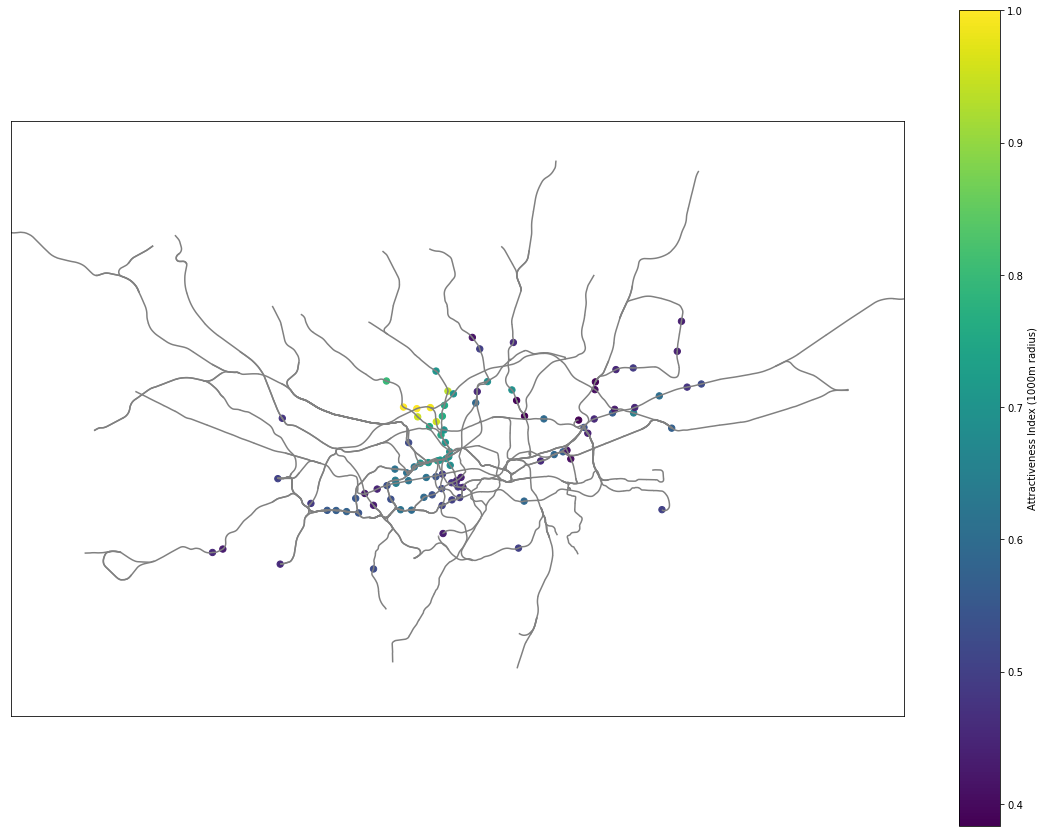

In [114]:
# FINAL SCORE

fig, ax = plt.subplots(figsize=(20,15))

lines.plot(ax=ax, color='grey', edgecolor='white')
top_100_final_score.plot(column = "final_score_transformed", ax=ax, marker='o', cmap='viridis', markersize= 40,
                       legend=True, legend_kwds={'label':'Attractiveness Index (1000m radius)'})
# ax.set_title("Distribution of Top 100 Green Resilient Stations");

# Set the x and y limits
ax.set_xlim([500000, 560000])
ax.set_ylim([165000, 205000])
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("output/top_100_map.png")

In [115]:

lin_reg_results_pval = pd.read_csv('data/lin_reg_results_pval.csv')
tgt = top_100_final_score.merge(lin_reg_results_pval, right_on = 'station', left_on = 'name', how = 'left')
tgt_pos = tgt[tgt['coef_sign'] == 1]
tgt_neg = tgt[tgt['coef_sign'] == 0]

realtop100list_neg=tgt_neg['name'].tolist()
realtop100list=tgt_pos['name'].tolist()


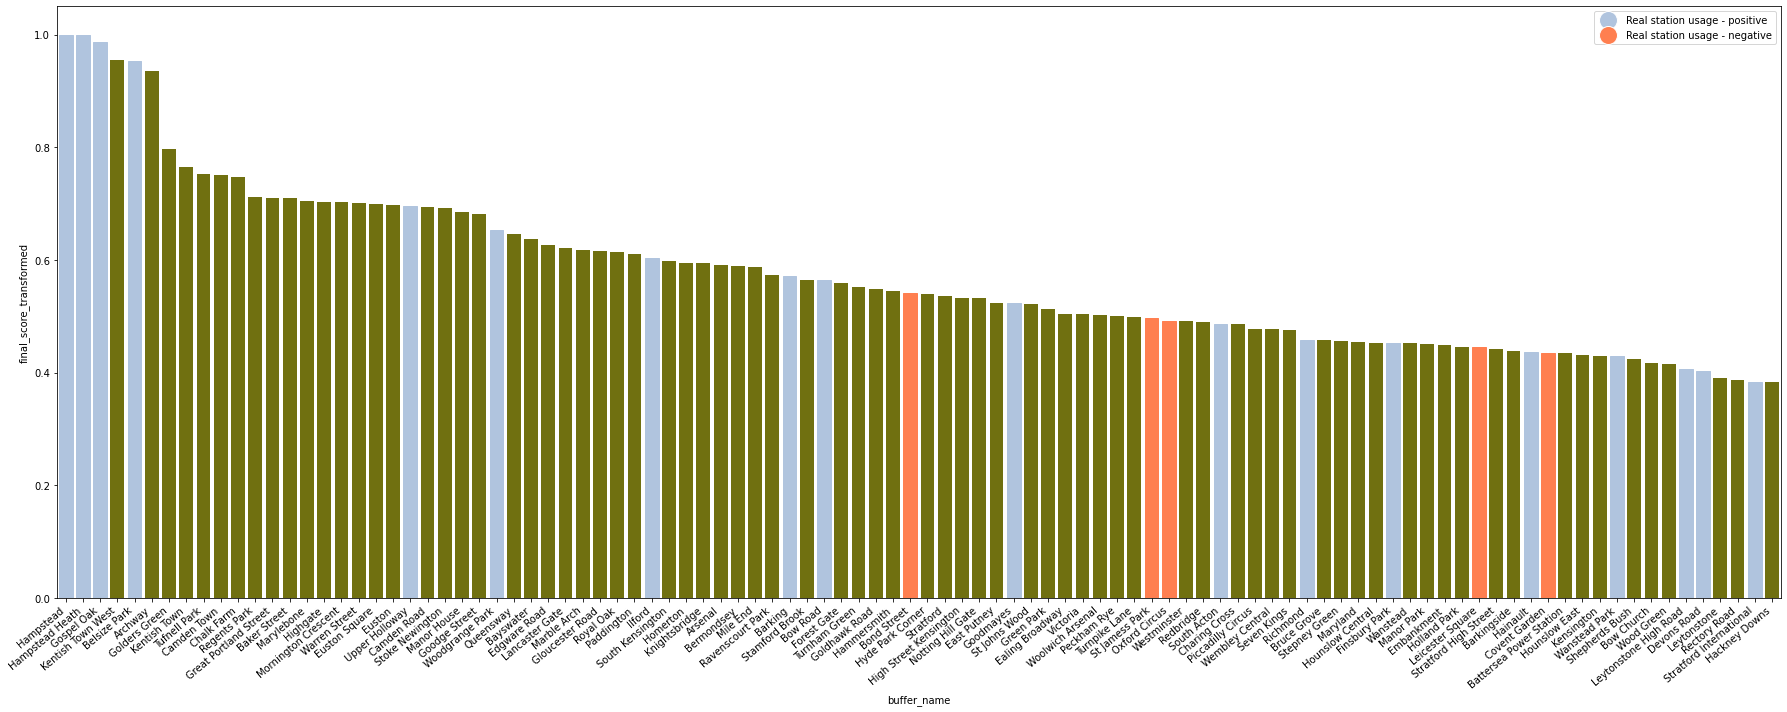

In [137]:
plt.figure(figsize=(25, 10))

ax = sns.barplot(data=top_100_final_score, y='final_score_transformed', x='buffer_name', color = 'olive')

# Highlight bars with blue color for names in the highlight_names list
for bar, name in zip(ax.patches, top_100_final_score['buffer_name']):
    if name in realtop100list:
        bar.set_color('lightsteelblue')
    if name in realtop100list_neg:
        bar.set_color('coral')


# ax.set_title("Barchart of top 100 Heat Resilient Stations")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

custom_legend = [
    plt.Line2D([0], [0], marker='o', color='w', label='Real station usage - positive',
               markersize=18, markerfacecolor='lightsteelblue'),
    plt.Line2D([0], [0], marker='o', color='w', label='Real station usage - negative',
               markersize=18, markerfacecolor='coral')
]
ax.legend(handles=custom_legend)


plt.savefig("output/top_100_barchart.png")
plt.show()

(165000.0, 205000.0)

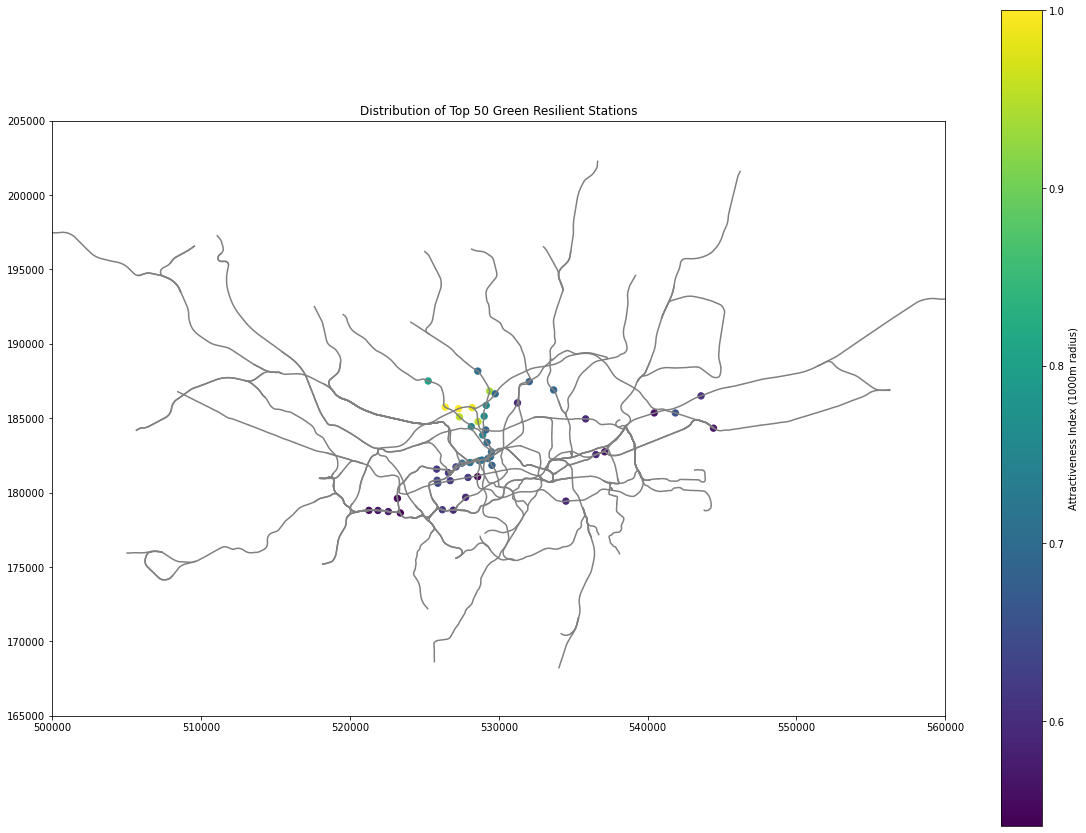

In [117]:
# FINAL SCORE

fig, ax = plt.subplots(figsize=(20,15))

lines.plot(ax=ax, color='grey', edgecolor='white')
top_50_final_score.plot(column = "final_score_transformed", ax=ax, marker='o', cmap='viridis', markersize= 40,
                       legend=True, legend_kwds={'label':'Attractiveness Index (1000m radius)'})
ax.set_title("Distribution of Top 50 Green Resilient Stations")

# Set the x and y limits
ax.set_xlim([500000, 560000])
ax.set_ylim([165000, 205000])

## Constructing data for stage 3

### Population per 1000m buffer

In [118]:
buffer_1000 = gpd.read_file('qgis_data/buffer_1000.shp')
buffer_1000 =buffer_1000.to_crs('epsg:27700')
lsoa_pop = pd.read_excel('qgis_data/sape23dt13mid2020lsoabroadagesestimatesunformatted.xlsx', sheet_name = 'Mid-2020 Persons', header = 4)
lsoa_pop.drop(['LSOA Name', 'LA Code (2018 boundaries)', 'LA name (2018 boundaries)', '0-15', '16-29', '30-44', '45-64', '65+'], axis = 1, inplace = True)
lsoa_pop = lsoa_pop[lsoa_pop['LA Code (2021 boundaries)'].str.startswith('E09')]
lsoa_boundaries = lsoa[['lsoa_cd', 'geometry', 'area']]

/opt/conda/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [119]:
lsoa_pop_bound = pd.merge(lsoa_boundaries, lsoa_pop, left_on='lsoa_cd', right_on='LSOA Code')
lsoa_pop_bound.drop(['LA Code (2021 boundaries)', 'LA name (2021 boundaries)', 'LSOA Code'], axis = 1, inplace = True)
lsoa_pop_bound = gpd.GeoDataFrame(lsoa_pop_bound, geometry='geometry')
lsoa_pop_bound =lsoa_pop_bound.to_crs('epsg:27700')

In [120]:
lsoa_pop_bound_intersect = buffer_1000_simple.overlay(lsoa_pop_bound, how='intersection')

In [121]:
b1000_poplist = lsoa_pop_bound_intersect.groupby('name')['lsoa_cd'].agg(list).reset_index()
b1000_poplist['count'] = b1000_poplist['lsoa_cd'].apply(len)

In [122]:
# overlapping lsoa
overlapping_lsoas = b1000_poplist['lsoa_cd']

In [123]:
overlapping_lsoas_list = overlapping_lsoas.tolist()

In [124]:
print(len(overlapping_lsoas_list))
print(len(buffer_1000_simple['name']))

378
399


In [125]:
merged_df = buffer_1000.merge(b1000_poplist, on='name', how='inner')

In [126]:
results = []

# Iterate through each buffer in merged_df
for idx, row in merged_df.iterrows():
    buffer_name = row['name']
    buffer_geom = row['geometry']
    overlapping_lsoas = row['lsoa_cd']
    
    # Calculate the total area of the buffer
    total_buffer_area = buffer_geom.area
    
    # Calculate the total area of each LSOA region that overlaps with the buffer
    for lsoa_cd in overlapping_lsoas:
        lsoa_geom = lsoa[lsoa['lsoa_cd'] == lsoa_cd]['geometry'].iloc[0]
        intersection_area = buffer_geom.intersection(lsoa_geom).area
        
        # Calculate the percentage of the LSOA region that overlaps with the buffer
        overlap_percentage = (intersection_area / lsoa_geom.area) * 100
        
        # Append the result to the list
        results.append({'buffer_name': buffer_name, 'lsoa_region': lsoa_cd, 'overlap_percentage': overlap_percentage})

# Create a new DataFrame to store the results
overlap_df = pd.DataFrame(results)

In [127]:
calculation = overlap_df.merge(lsoa_pop, left_on='lsoa_region', right_on='LSOA Code', how='inner')
calculation = calculation.drop(columns='LSOA Code')
calculation = calculation.sort_values(by='buffer_name')

In [128]:
calculation['weighted_pop'] = calculation['All Ages'] * (calculation['overlap_percentage']/100)

# Group by 'buffer_name' and calculate the final score by summing the weighted scores
pop_in_1000 = calculation.groupby('buffer_name')['weighted_pop'].sum().reset_index()

In [129]:
pop_in_1000 = pop_in_1000.sort_values(by='weighted_pop')

(array([ 6., 38., 56., 47., 53., 51., 47., 39., 19.,  3.,  5.,  2.,  2.,
         0.,  1.,  1.,  1.,  3.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.10518340e+02, 6.76534081e+03, 1.34201633e+04, 2.00749857e+04,
        2.67298082e+04, 3.33846307e+04, 4.00394532e+04, 4.66942756e+04,
        5.33490981e+04, 6.00039206e+04, 6.66587430e+04, 7.33135655e+04,
        7.99683880e+04, 8.66232104e+04, 9.32780329e+04, 9.99328554e+04,
        1.06587678e+05, 1.13242500e+05, 1.19897323e+05, 1.26552145e+05,
        1.33206968e+05, 1.39861790e+05, 1.46516613e+05, 1.53171435e+05,
        1.59826258e+05, 1.66481080e+05, 1.73135903e+05, 1.79790725e+05,
        1.86445547e+05, 1.93100370e+05, 1.99755192e+05, 2.06410015e+05,
        2.13064837e+05, 2.19719660e+05]),
 <BarContainer object of 33 artists>)

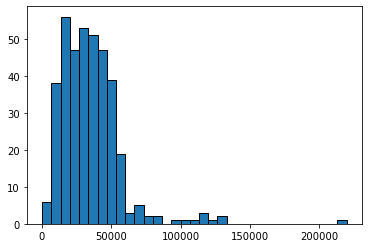

In [130]:
plt.hist(pop_in_1000['weighted_pop'], bins=33, edgecolor='black')

In [131]:
pop_in_1000_gdf = pop_in_1000.merge(buffer_1000_simple, left_on = 'buffer_name', right_on = 'name', how = 'left')
pop_in_1000_gdf.to_csv('data/pop_in_1000_gdf.csv')

In [132]:
transformed_df_geo.to_csv('data/transformed_df_geo.csv')

## Viz

In [133]:
borough = gpd.read_file('source_data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')
borough.drop(['GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'SUB_2009', 'SUB_2006'],axis = 1,  inplace = True)
borough =borough.to_crs('epsg:27700')

green_space_viz = green_space_os_publicpark_garden.drop(['gml_id', 'function', 'green_area','region_category'], axis = 1)
green_space_viz =green_space_viz.to_crs('epsg:27700')

station_viz = buffer_1000_simple.drop('geometry', axis = 1)
station_viz.rename(columns = {'stn_centroid':'geometry'},inplace = True)

station_viz =station_viz.to_crs('epsg:27700')


In [134]:
pip install matplotlib-scalebar


Note: you may need to restart the kernel to use updated packages.


NameError: name 'mpatches' is not defined

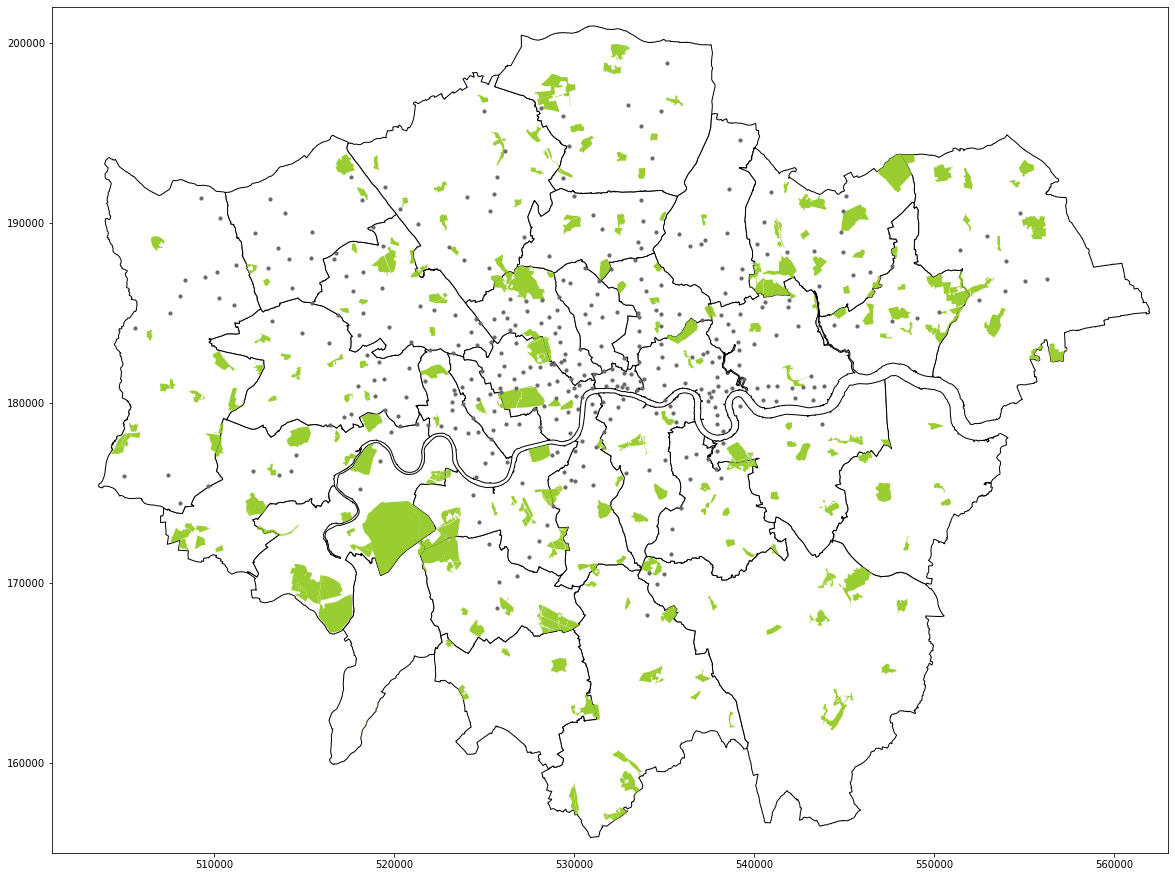

In [135]:

clipped_green_space = gpd.overlay(green_space_viz, borough, how='intersection')
clipped_station = gpd.overlay(station_viz, borough, how='intersection')

# Create a subplot with a single plot
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# Plot each shapefile
borough.plot(ax=ax, edgecolor='black', facecolor='white')
clipped_green_space.plot(ax=ax, color='yellowgreen', markersize=5)
clipped_station.plot(ax=ax, color='dimgray', markersize=10)

# Set the x and y limits
ax.set_xlim([501000, 563000])
ax.set_ylim([155000, 202000])

# Manually create legend handles and labels
legend_handles = [mpatches.Patch(color='yellowgreen', label='green spaces'),
                  mpatches.Patch(color='dimgray', label='LU stations')]

# Create the legend
ax.legend(handles=legend_handles, loc='upper right')

# Add scale bar
scalebar = ScaleBar(1, location='lower right')  # 1: 1 meter
ax.add_artist(scalebar)

plt.savefig("output/greenspace_station viz.png")
# Show the plot
plt.show()
